In [75]:
#import necessary libraries for DCGAN

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
tf.__version__

'2.15.0'

In [76]:
#This is dataset of 60,000 28x28 pixel grayscale images

(X_train, y_train), (_,_)= tf.keras.datasets.mnist.load_data()
#mnist 60000 images testing ke liye de raha hai , jo second wala tuple hai usmein waise toh testing wala data jata hai...par humein data testing ke liye nahi bhejna isliye us tuple ko khali chhoda hai

In [77]:
#NumPy array of grayscale image data with shape

X_train.shape   # 28*28 = 784 pixels in an image

# independent variables in x_train  (all the 60,000 images)
# dependent variables in y_train  (the  class labels of the images)

(60000, 28, 28)

In [78]:
X_train
# pixels of images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [79]:
X_train[7]

# ndarray ---> numpy data array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  43, 139, 224, 226,
        252, 253, 252, 252, 252, 252, 252, 252, 158,  14,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 178, 252, 252, 252,
        252, 253, 252, 252, 252, 252, 252, 252, 252,  59,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 109, 252, 252, 230,
        132, 133, 132, 132, 189, 252, 252, 252, 252,  59,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  29,  29,  24,
          0,   0,   0,   0,  14, 226, 252, 252, 172,   7,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  85, 243, 252, 252, 144,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  88, 189, 252, 252, 252,  14,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  91, 212, 247, 252, 252, 252, 204,   9,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 125, 193, 193,
        193, 253, 252, 252, 252, 238, 102,  28,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  45, 222, 252, 252, 252,
        252, 253, 252, 252, 252, 177,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  45, 223, 253, 253, 253,
        253, 255, 253, 253, 253, 253,  74,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 123,  52,  44,
         44,  44,  44, 143, 252, 252,  74,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  15, 252, 252,  74,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  86, 252, 252,  74,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   5,  75,   9,   0,   0,   0,   0,
          0,   0,  98, 242, 252, 252,  74,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  61, 183, 252,  29,   0,   0,   0,   0,
         18,  92, 239, 252, 252, 243,  65,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 208, 252, 252, 147, 134, 134, 134, 134,
        203, 253, 252, 252, 188,  83,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 208, 252, 252, 252, 252, 252, 252, 252,
        252, 253, 230, 153,   8,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  49, 157, 252, 252, 252, 252, 252, 217,
        207, 146,  45,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [80]:
# Numpy array of digit labels or classes (integers in range 0 to 9)

y_train.shape

#in a tuple if we do not add "," then adding the "()" is waste
#but if we do not add "()" then it will be a int which is not the case

(60000,)

In [81]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [82]:
y_train[7]

3

4935
2


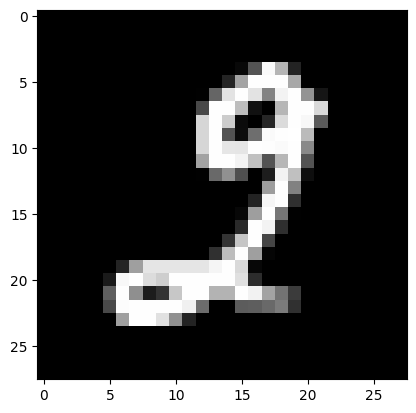

In [83]:
i = np.random.randint(0,60000)
print(i)
print(y_train[i])
plt.imshow(X_train[i], cmap = 'gray')

In [84]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
# X_train.shape[0]---> 60000, 28---->width, 28---->height, 1---->colour channel
# 1-----> colour channel for grayscale but if we wanted RGB colour channel then it would have been 3
# float32 ----> because in tensorflow we use float numbers and not int

In [85]:
X_train.shape

(60000, 28, 28, 1)

In [86]:
# maximum and minimum value in X_train : 0 for black pixel and 255 for white pixel

X_train[0].min(), X_train[0].max()

(0.0, 255.0)

In [87]:
# Scaling of pixels
# Normalization (for bringing the pixels in the range of -1 to +1 instead of 0 to 255)

X_train = (X_train - 127.5) / 127.5

In [88]:
X_train[0].min(), X_train[0].max()

(-1.0, 1.0)

In [89]:
# variables required to divide the dataset into batches

buffer_size = 60000   # Total number of images
batch_size = 256      # Total number of batches


# 256 batch size isliye kunki ek batch mein 234 images aa rahi hai....iska matlab ek equilibrium jaisa aa raha hai.....na hi batch size bahut bada hai aur na hi ek batch mein number of images zyada hain

In [90]:
buffer_size / batch_size        # each batch contains 234 images

234.375

In [91]:
type(X_train)

numpy.ndarray

In [92]:
# we need to convert to the Tensorflow format to send it to the neural network

X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [93]:
type(X_train)

# jo neeche output mein .ops hai woh operations hai

tensorflow.python.data.ops.batch_op._BatchDataset

In [94]:
X_train   # X_train is now in the form of set of batches i.e. batch dataset

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [95]:
# Creating networks of GANs

In [96]:
# the first step is to create a function def build Generator
# it does not receive any parameter

def build_generator():
  # Step 1: tf.keras.Sequential() is the default class to build neural networks using TensorFlow
  #This model will be used to generate synthetic images

  network = tf.keras.Sequential()
  #.....................................................................

  # Step 2 : Add layers to the dense network

  # Note : Dense Network : a dense layer is when the neuron of one layer is connected to all
  network.add(layers.Dense(units = 7*7*256, use_bias = False, input_shape = (100,)))   # ultimate answer 28*28 chahiye tha...isliye 7*7 se start kiya taki yeh aise aage bhade (7*7, 14*14, 28*28)

  # Add a fully connected (Dense) layer with 7*7*256 units which takes a 100 dimensional random noise vector as input
  # 'units'  parameter  is the number of neurons i.e. 7*7*256 = 12,544 neurons in first layer of neural network
  # use_bias = False means no bias terms are used in the layer  (we don't need it in the generator as we are not actually training a neural network to classify images )
  # The last parameter input shape. It is the number of neurons in the input layer of the neural network
  # The default value for Gans is 100. Thus, 100 neurons in the input layer, are connected to 12

  #.........................................................................................

  # Step 3 : Apply normalization calculation in the layers of the neural network

  network.add(layers.BatchNormalization())

  #................................................................................................

  # Step 4:

  network.add(layers.LeakyReLU())

  #...................................................................................................


  #Step 5:

  network.add(layers.Reshape((7,7,256)))

  #............................................................................................................

  #Step 6:

  # Upscaling

  # First hidden layer
  network.add(layers.Conv2DTranspose(filters = 128, kernel_size = (5,5), padding = 'same', use_bias = False))   # here we have not added strides...so default stride(1,1)
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # filters batate hain present layer se next kaise jayega
  # strides design internally in the layer

  # Second hidden layer
  network.add(layers.Conv2DTranspose(filters = 64, kernel_size = (5,5), padding = 'same', strides = (2,2), use_bias = False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())


  # Output Layer
  network.add(layers.Conv2DTranspose(filters = 1, kernel_size = (5,5), padding = 'same', strides = (2,2), use_bias = True, activation = 'tanh'))

  network.summary()

  return network

In [97]:
generator = build_generator()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12544)             1254400   
                                                                 
 batch_normalization_7 (Bat  (None, 12544)             50176     
 chNormalization)                                                
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 12544)             0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_6 (Conv2D  (None, 7, 7, 128)         819200    
 Transpose)                                                      
                                                                 
 batch_normalization_8 (Bat  (None, 7, 7, 128)        

In [98]:
generator.input

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_4_input')>

In [99]:
noise = tf.random.normal([1,100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-1.5019246 ,  0.8838396 ,  0.6339903 ,  1.8914033 ,  0.98804337,
        -0.02095718, -1.6113962 , -0.88188076,  1.0653415 ,  0.96606046,
        -0.42168716,  0.24559644, -0.87565726, -0.39636174, -1.7372899 ,
         0.24816681,  0.8595462 ,  0.6190013 ,  0.21188894, -0.9514919 ,
         0.9219898 ,  2.1832516 , -0.70648503,  0.34452847,  0.7358218 ,
         0.831147  , -0.3001626 ,  1.0877546 , -1.4245645 , -0.25204718,
        -1.1112356 , -0.39159837, -1.396239  ,  0.6276872 ,  0.19999409,
        -1.7882087 , -0.9366139 ,  0.53808016, -0.33599213, -1.3600198 ,
        -0.09186254,  0.3229953 ,  0.49310863, -0.13384432, -1.2082517 ,
         0.10436855,  1.0112833 ,  1.1382203 , -0.48274305, -0.6874258 ,
        -1.2121356 ,  0.1085448 ,  1.321102  ,  0.26777834,  0.49711072,
         0.79117864, -0.31053644,  1.6053337 , -0.11408719,  1.464446  ,
         0.7372518 ,  0.75083584, -0.06075382,  0.7005572 ,  1.6126846 ,
 

In [100]:
generated_image = generator(noise,training = False)

In [101]:
generated_image.shape

TensorShape([1, 28, 28, 1])

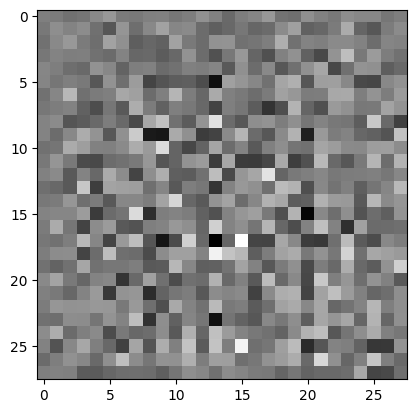

In [102]:
plt.imshow(generated_image[0,:,:,0], cmap = 'gray')

In [103]:
def build_discriminator():
  network = tf.keras.Sequential()

  network.add(layers.Conv2D(filters = 64, strides = (2,2), kernel_size = (5,5), padding = 'same',  input_shape = [28,28,1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  network.add(layers.Conv2D(filters = 128, strides = (2,2), kernel_size = (5,5), padding = 'same'))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  network.add(layers.Flatten())

  network.add(layers.Dense(1))

  network.summary()

  return network

In [104]:
discriminator = build_discriminator()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)             

In [105]:
7*7*128

6272

In [106]:
discriminator.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_2_input')>

In [107]:
discriminator(generated_image, training = False)

# -0.00177821 is a LOGITS (functional value created by neural networks which we cannot understand....so we use sigmoid function to convert it into form which we can understand.....in our case it will be the probability)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00082013]], dtype=float32)>

In [108]:
tf.sigmoid(-0.00177821)

<tf.Tensor: shape=(), dtype=float32, numpy=0.49955544>

In [109]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)
# cross_entropy is used to calculate losses in DCGAN
# Gradients are used to calculate losses in other models

In [110]:
def discriminator_loss(expected_output, fake_output):

  real_loss = cross_entropy(tf.ones_like(expected_output),expected_output)

  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)

  total_loss = real_loss + fake_loss

  return total_loss

In [111]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output),fake_output)

In [112]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)

In [113]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [114]:
epochs = 100
noise_dimension = 100
number_of_images = 16

In [115]:
batch_size, noise_dimension

(256, 100)

In [121]:
@tf.function
def train(images):

  noise = tf.random.normal([batch_size, noise_dimension])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training = True)

    expected_output = discriminator(images, training = True)
    fake_output = discriminator(generated_images, training = True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(expected_output, fake_output)


    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))


    #zip is used to create a dictionary which at one side has generator_gradients and on the other has generator.trainable_variables

In [122]:
tf.config.run_functions_eagerly(True)
X_train_batch = X_train.as_numpy_iterator().next()
train(X_train_batch)

In [123]:
test_images = tf.random.normal([number_of_images, noise_dimension])
test_images.shape

TensorShape([16, 100])

In [124]:
60000 / 256

234.375

In [125]:
generated_images =[]
def train_gan(dataset, epochs, test_images):
  for epoch in range(epochs):
    #print(epoch)
    for image_batch in dataset:
      #print(image_batch.shape)
      train(image_batch)

    print('Epoch: ', epoch + 1)
    generated_images = generator(test_images, training = False)
    fig = plt.figure(figsize = (10,10))
    for i in range(generated_images.shape[0]):
      plt.subplot(4,4,i + 1)  # The subplot method has 3 arguments: rows, columns and index of the current plot.
      plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
    plt.show()

Epoch:  1


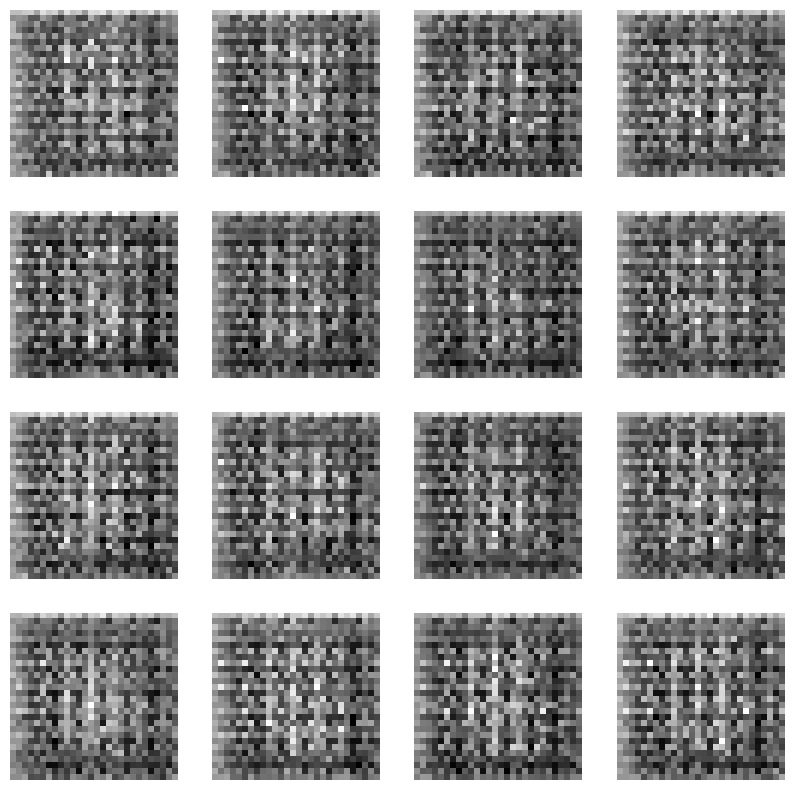

Epoch:  2


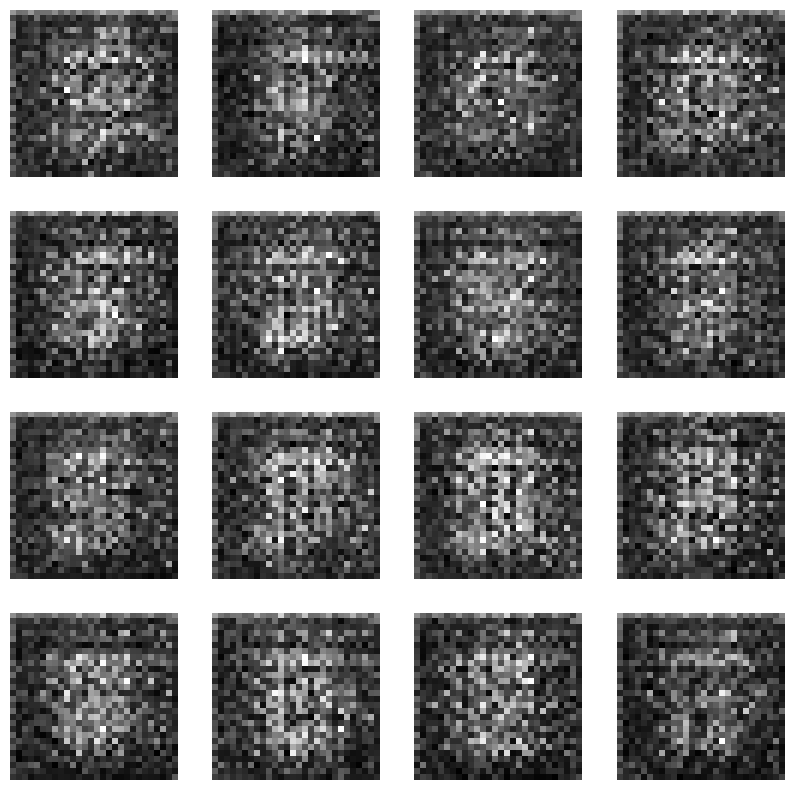

Epoch:  3


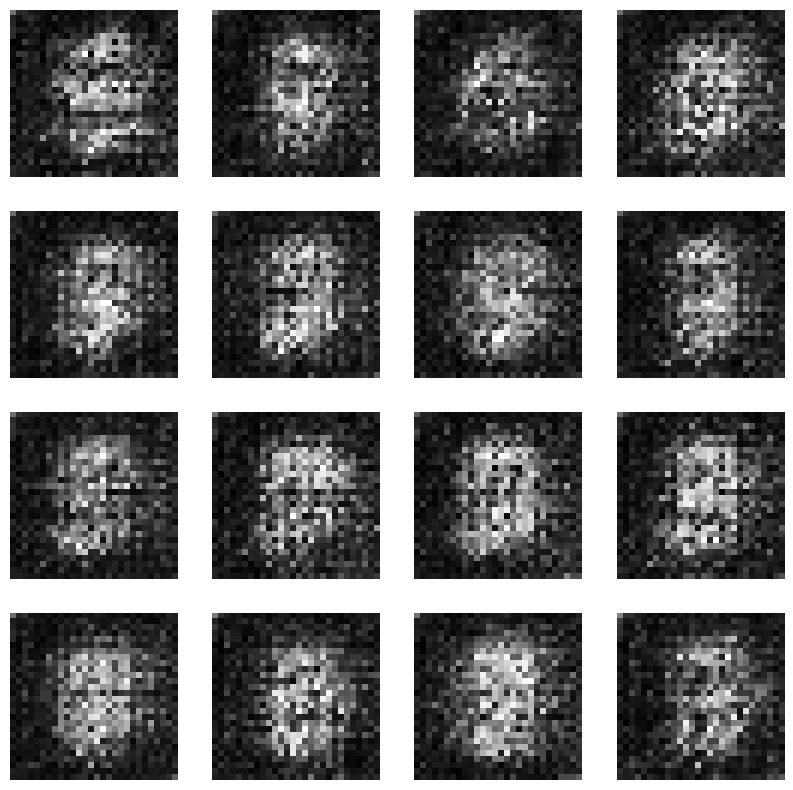

Epoch:  4


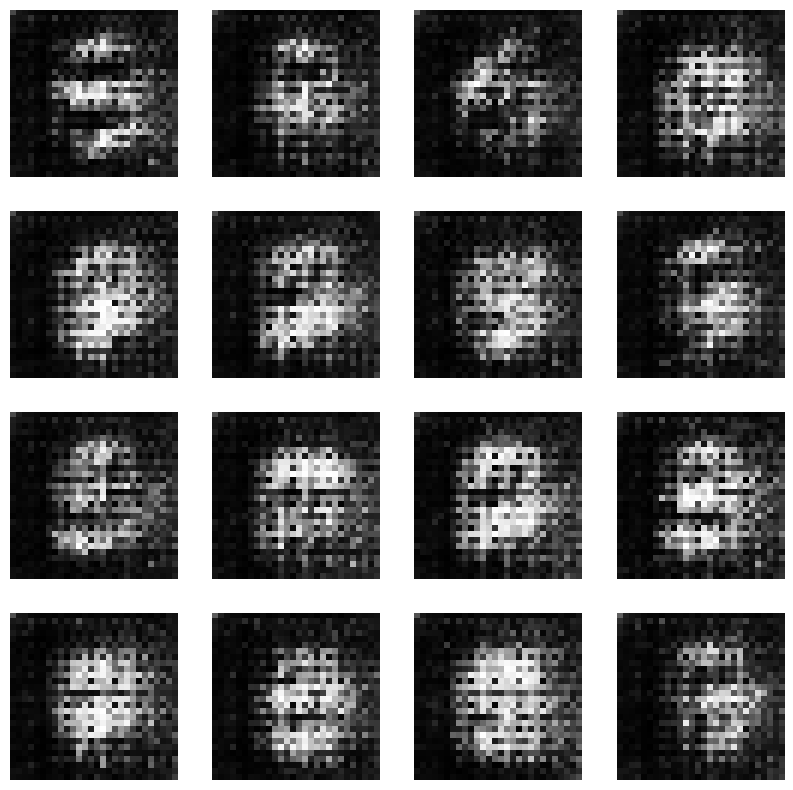

Epoch:  5


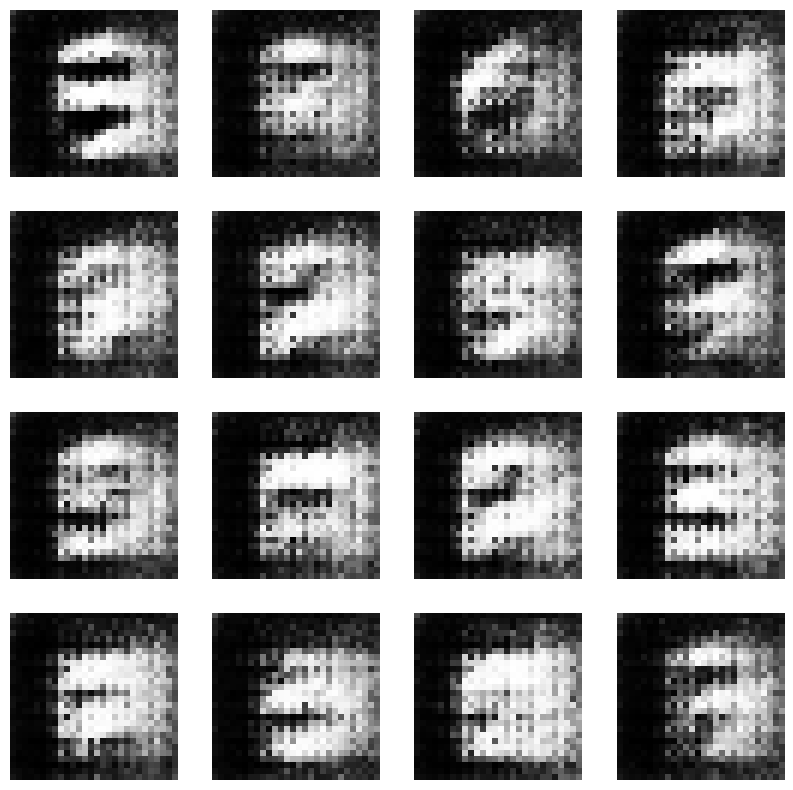

Epoch:  6


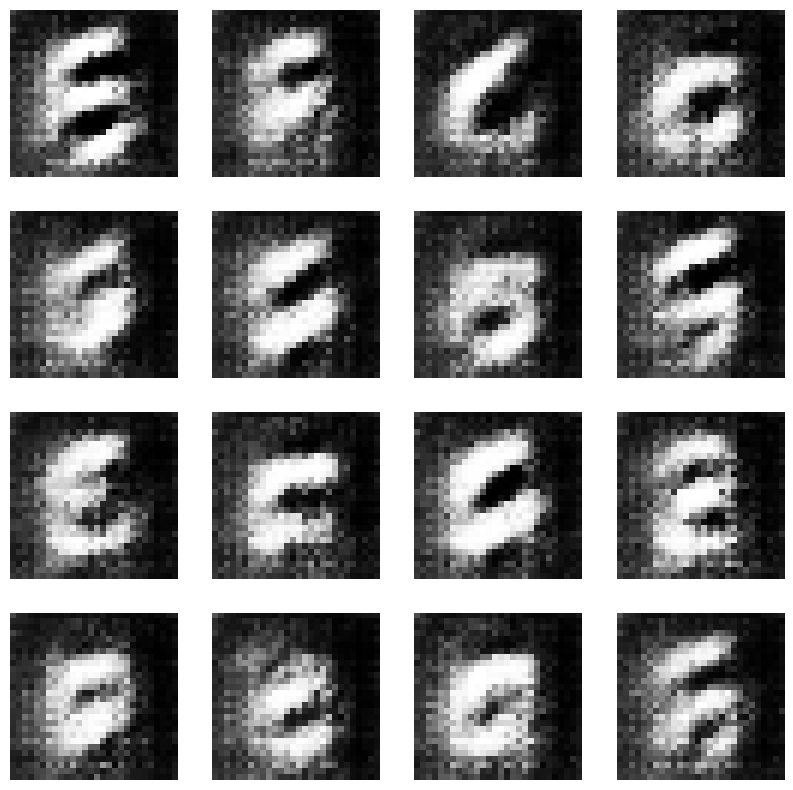

Epoch:  7


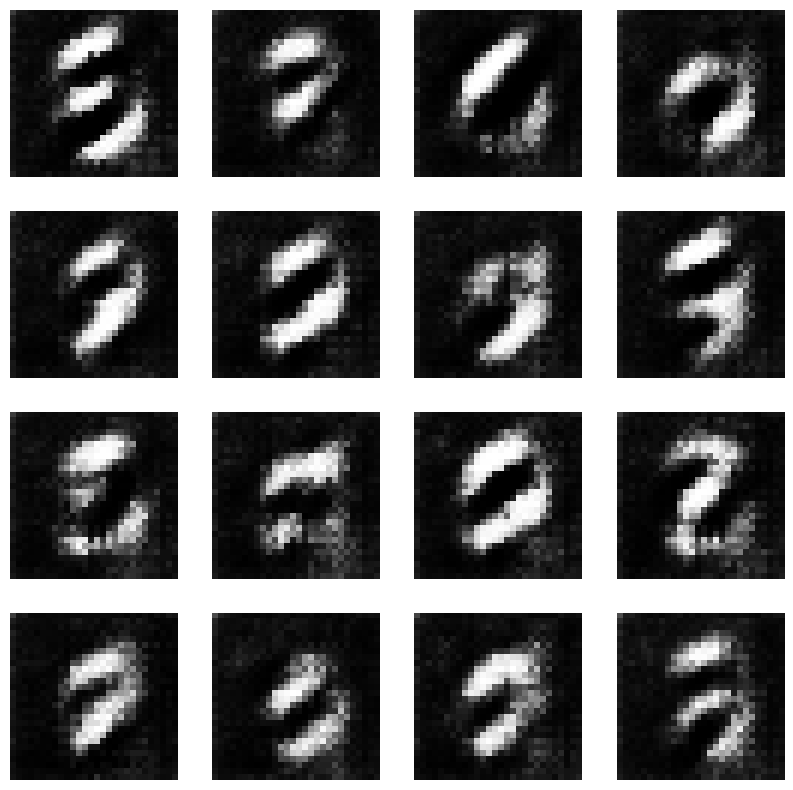

Epoch:  8


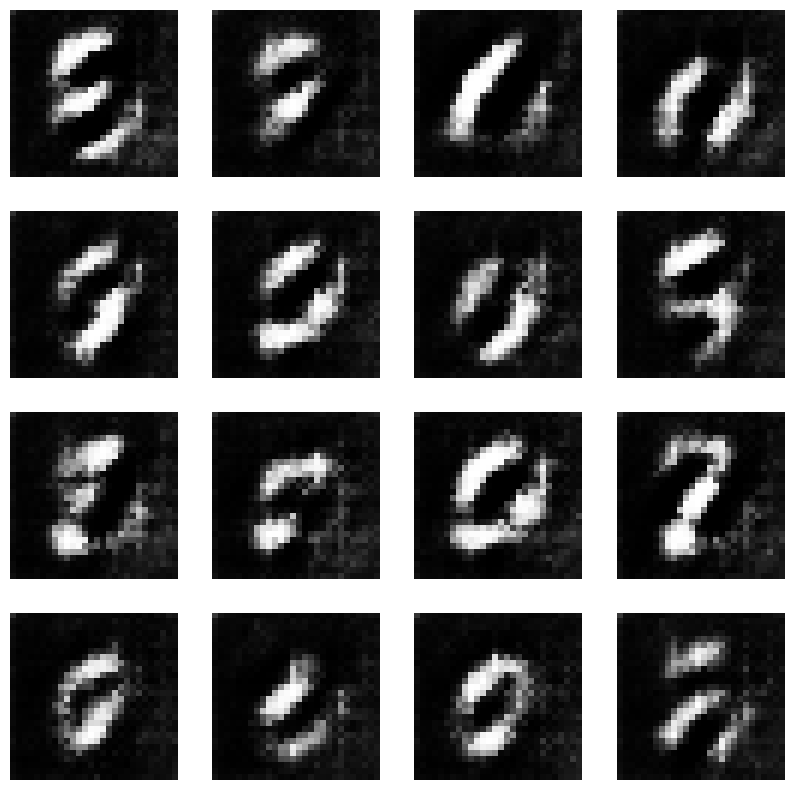

Epoch:  9


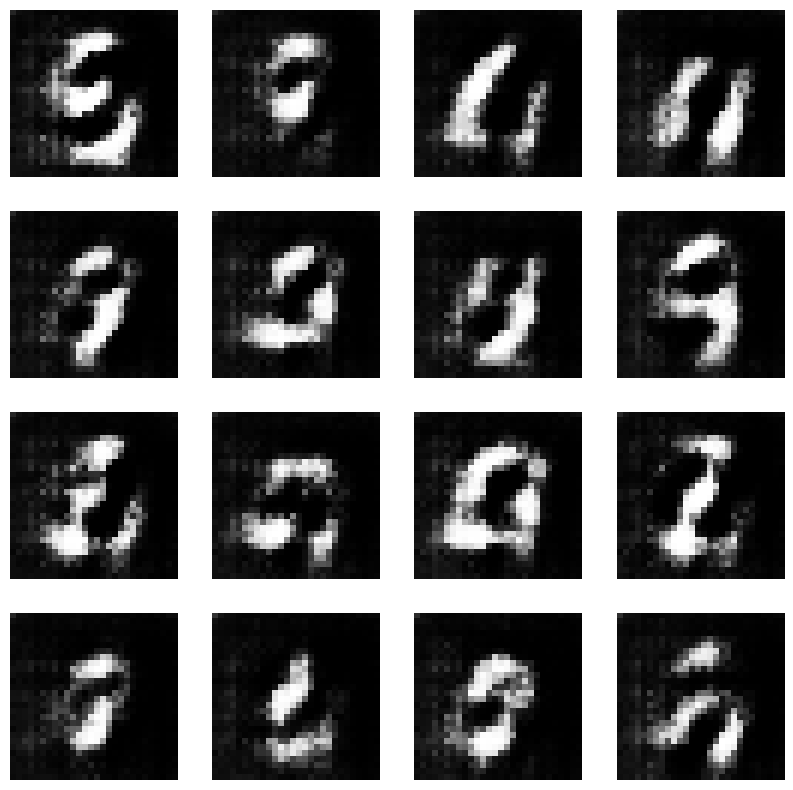

Epoch:  10


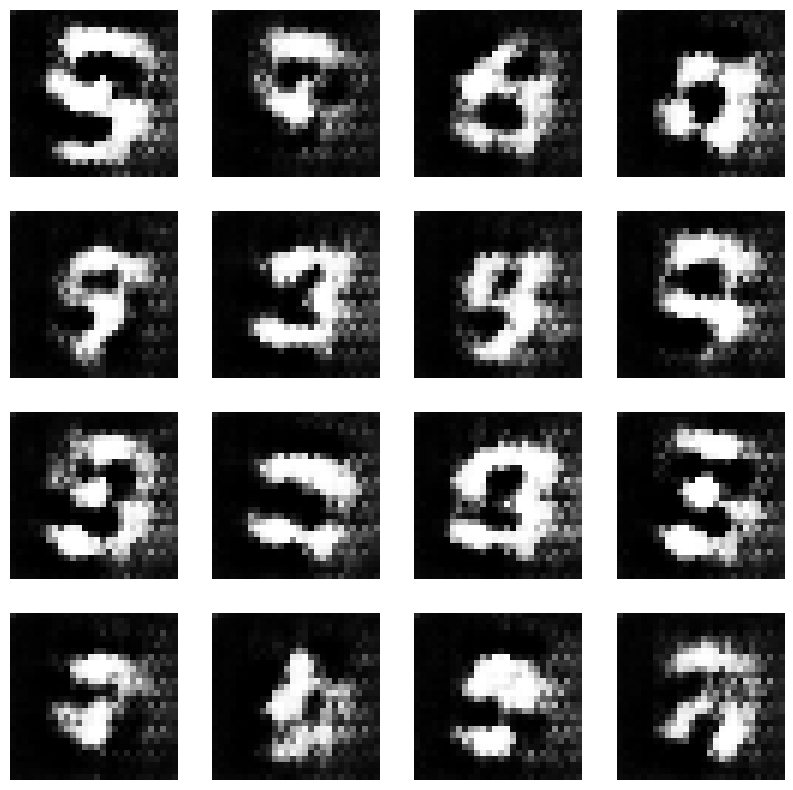

Epoch:  11


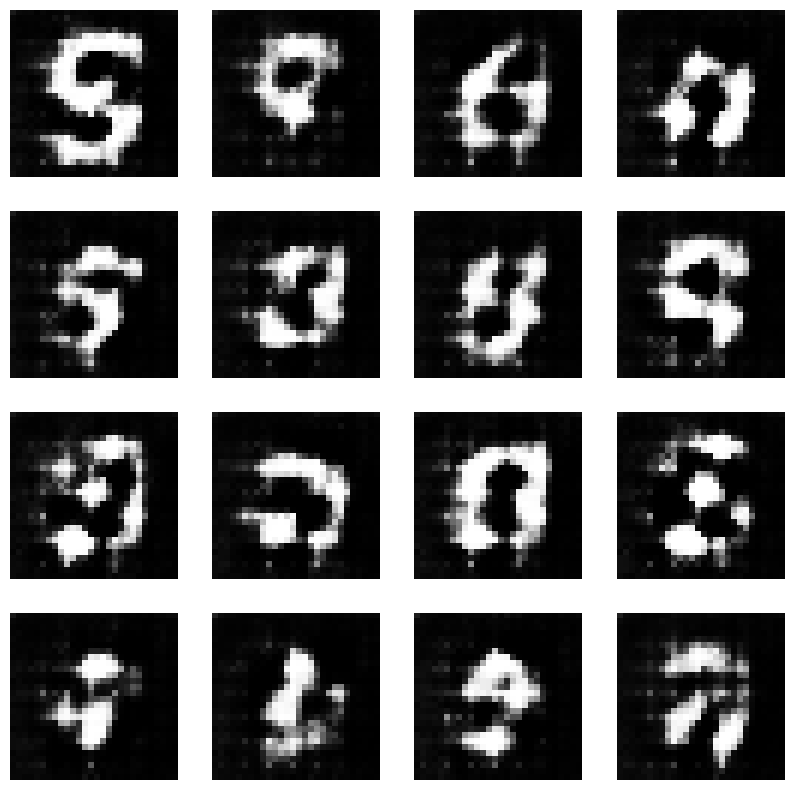

Epoch:  12


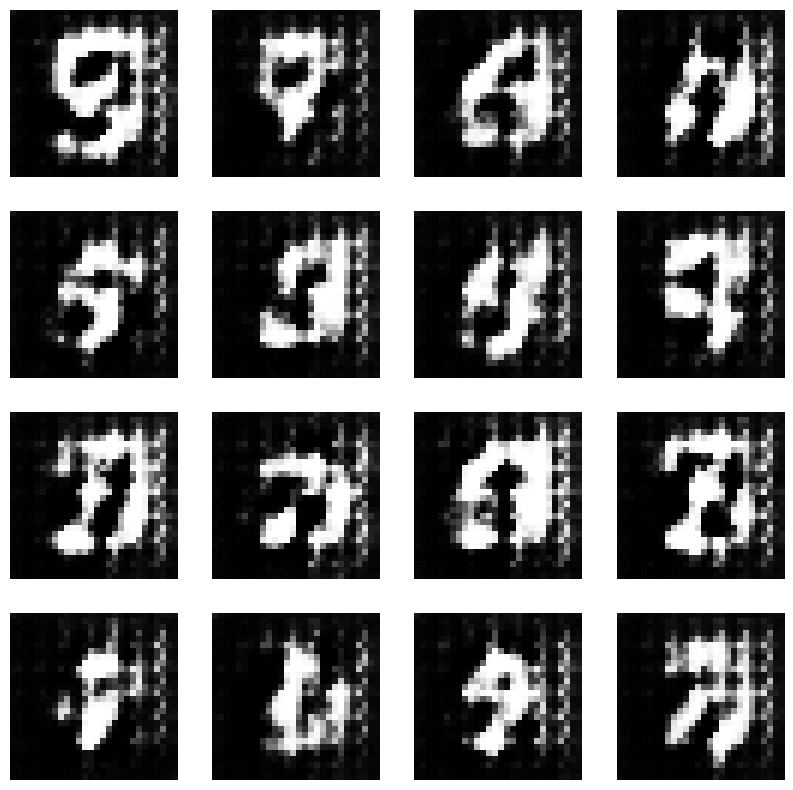

Epoch:  13


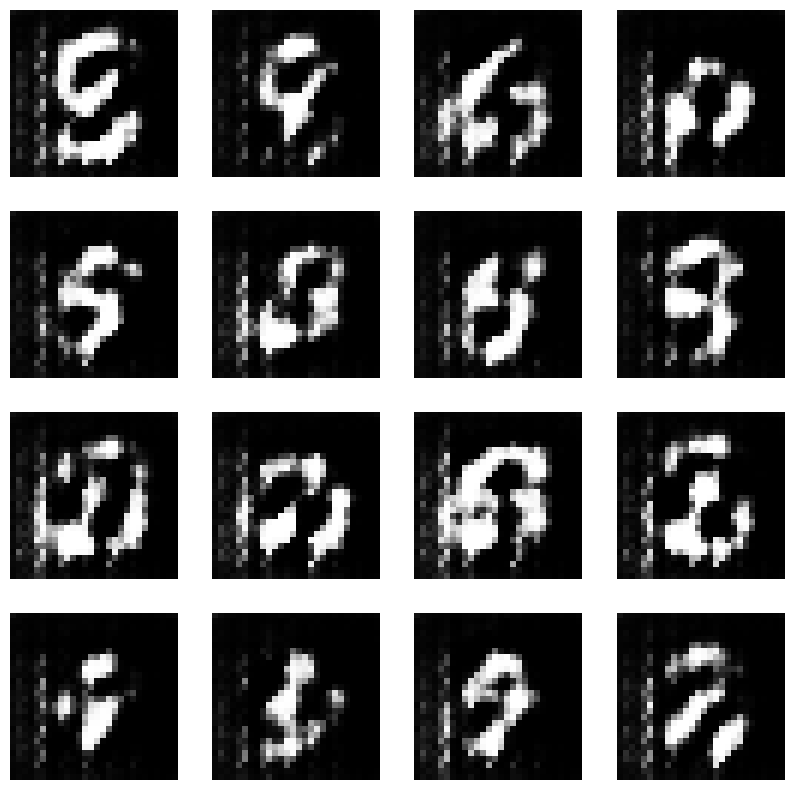

Epoch:  14


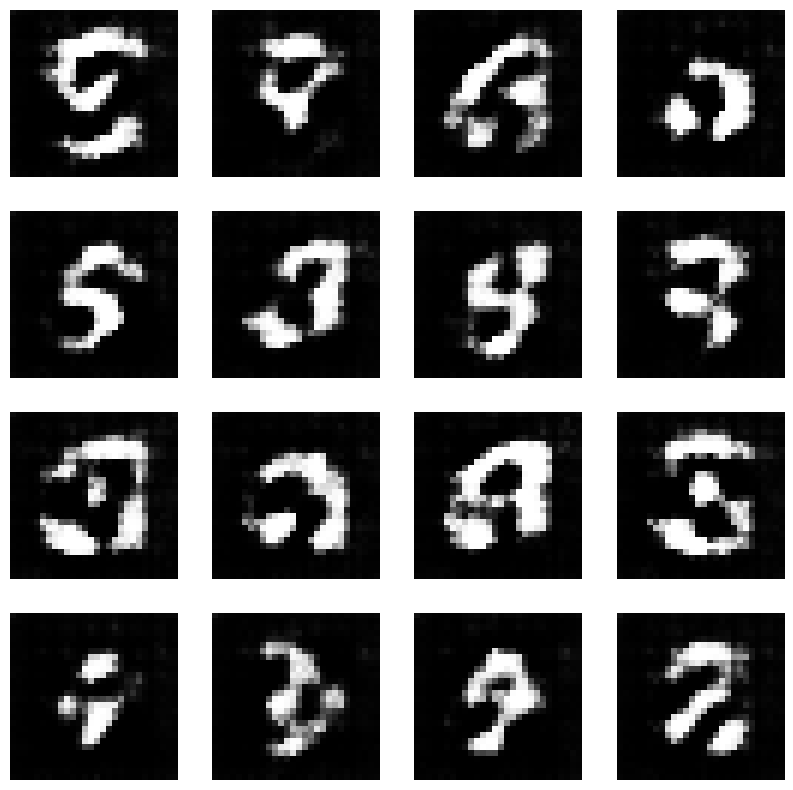

Epoch:  15


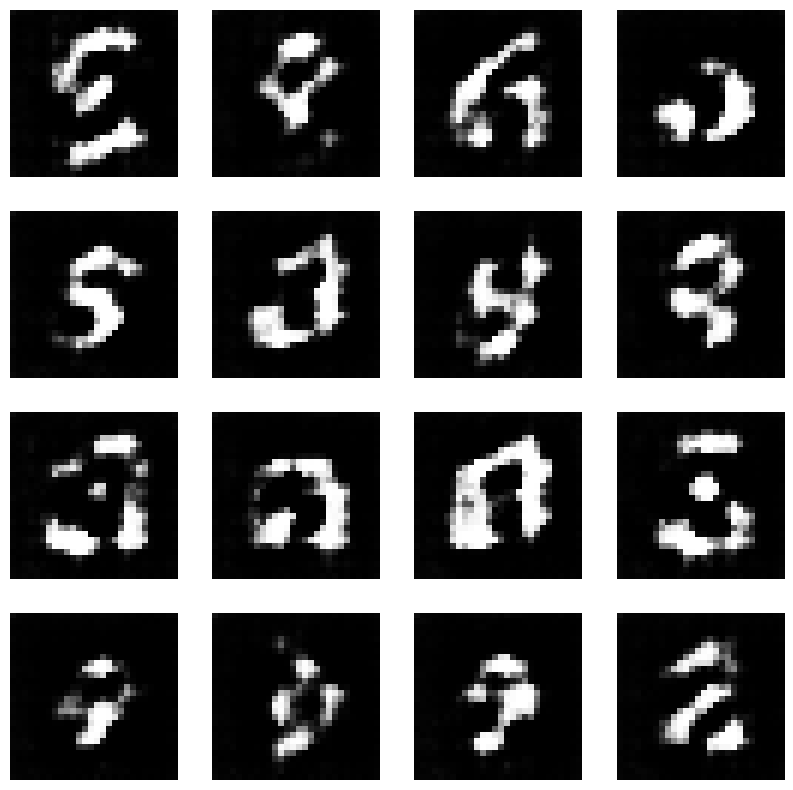

Epoch:  16


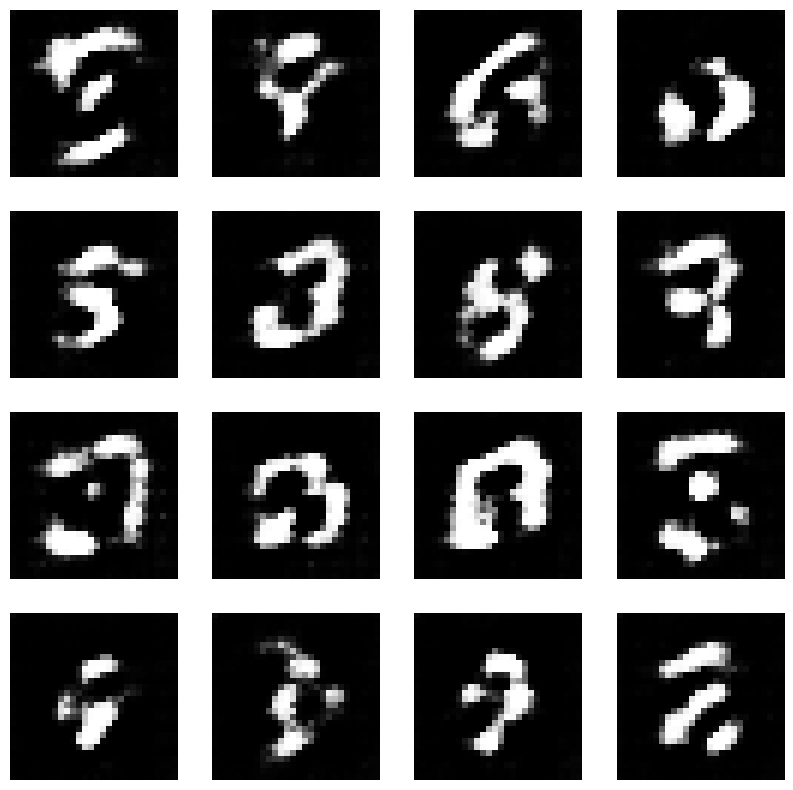

Epoch:  17


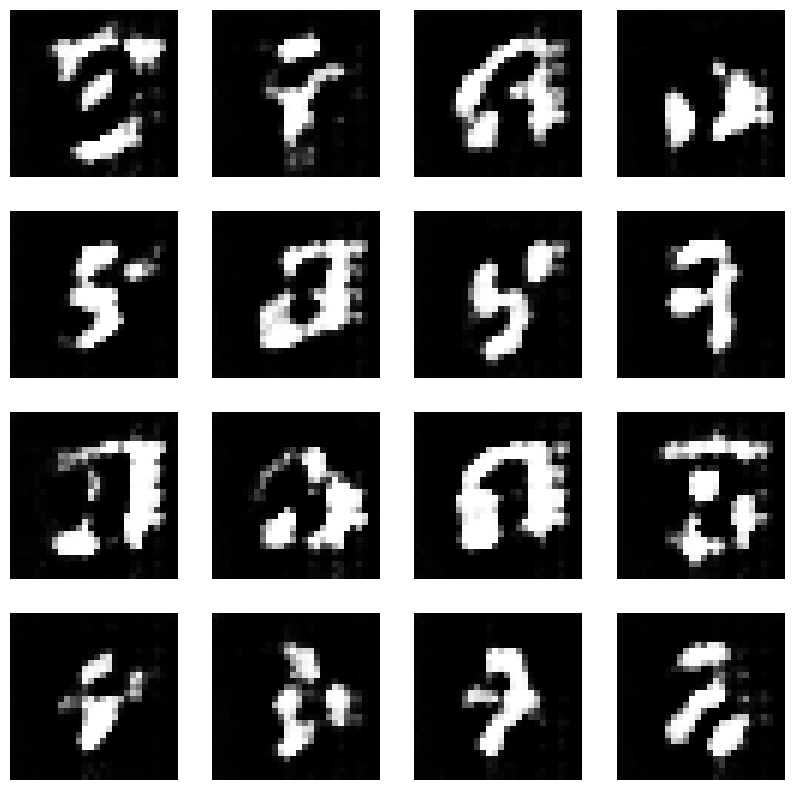

Epoch:  18


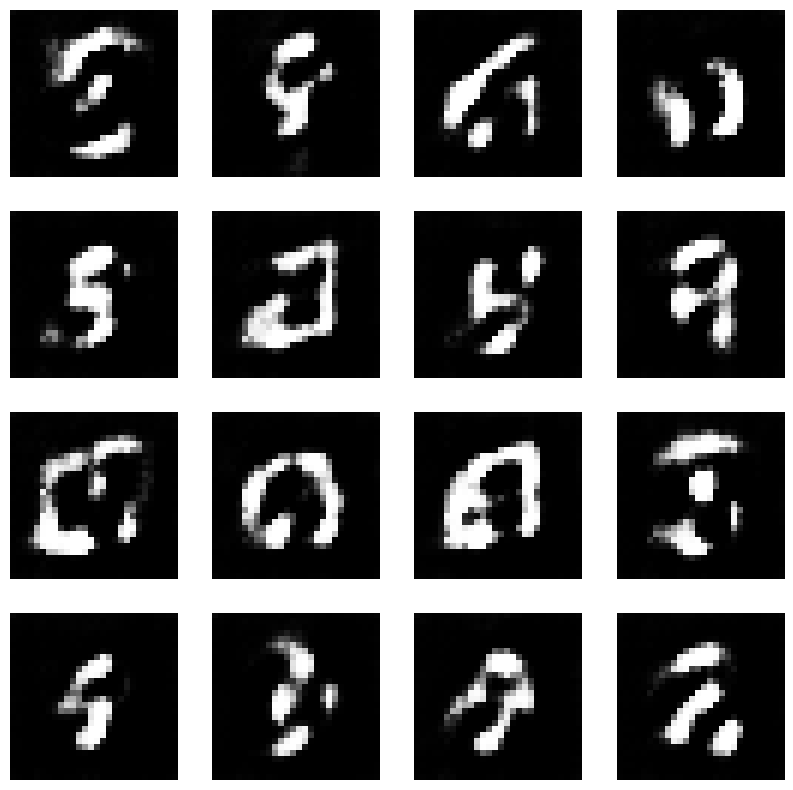

Epoch:  19


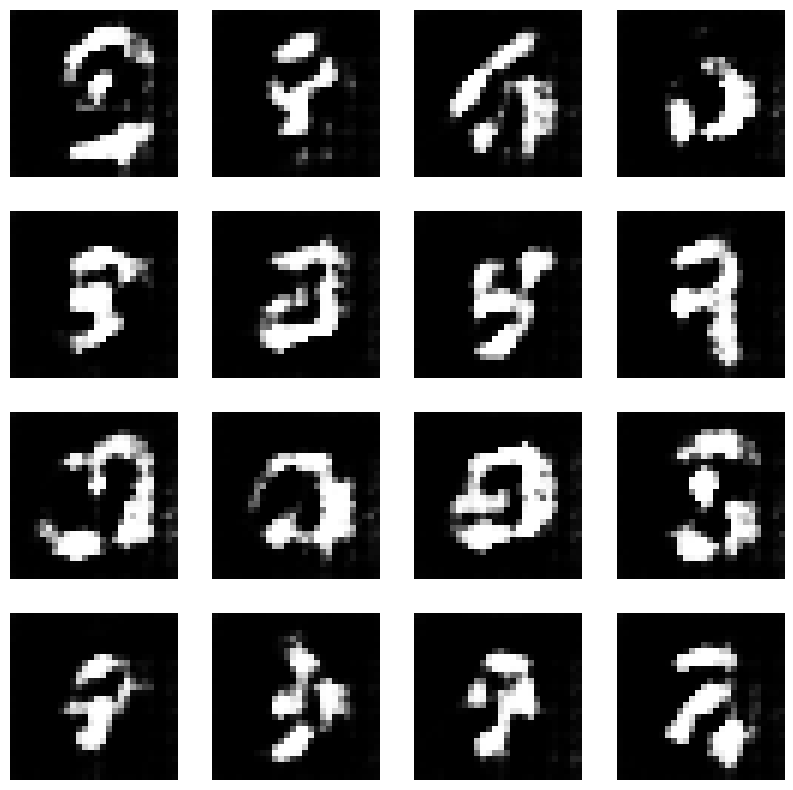

Epoch:  20


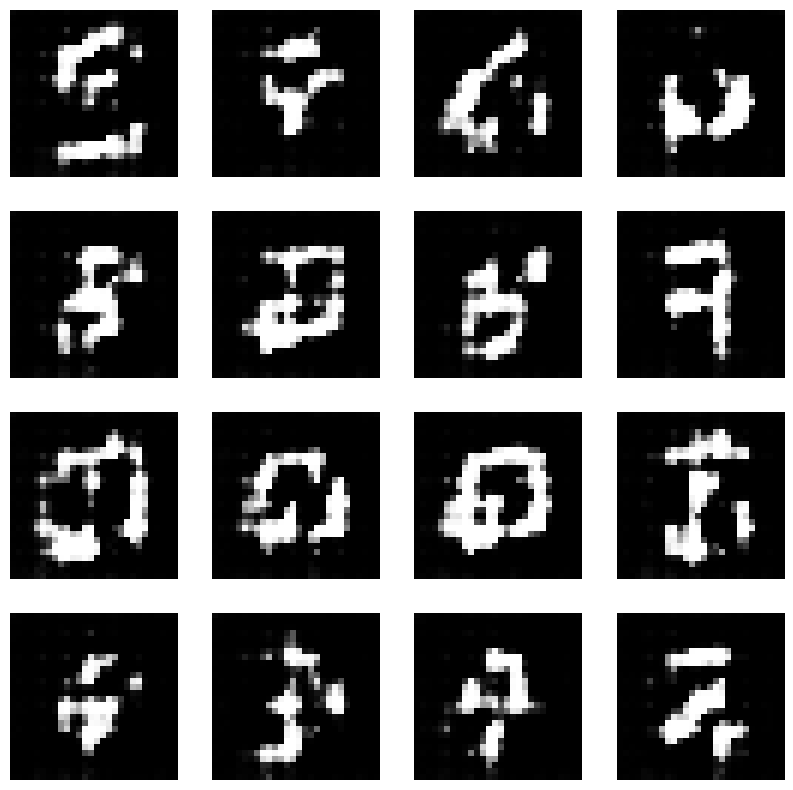

Epoch:  21


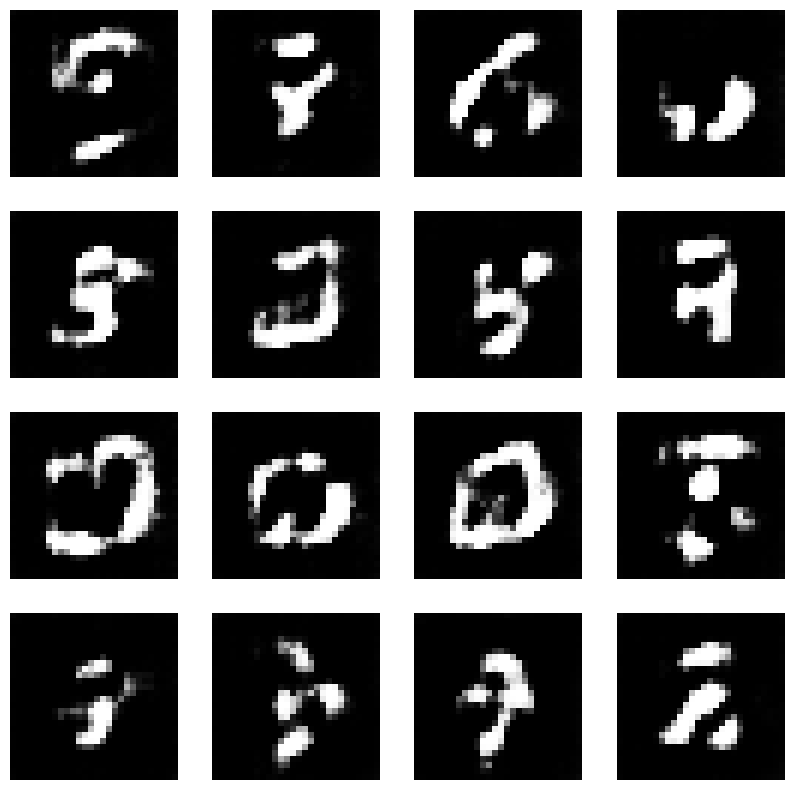

Epoch:  22


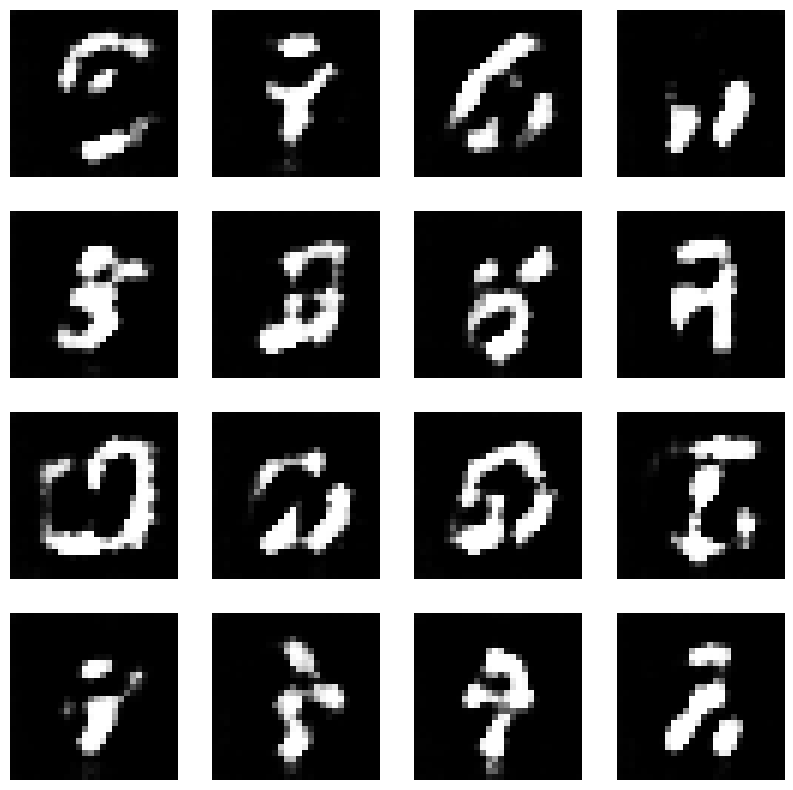

Epoch:  23


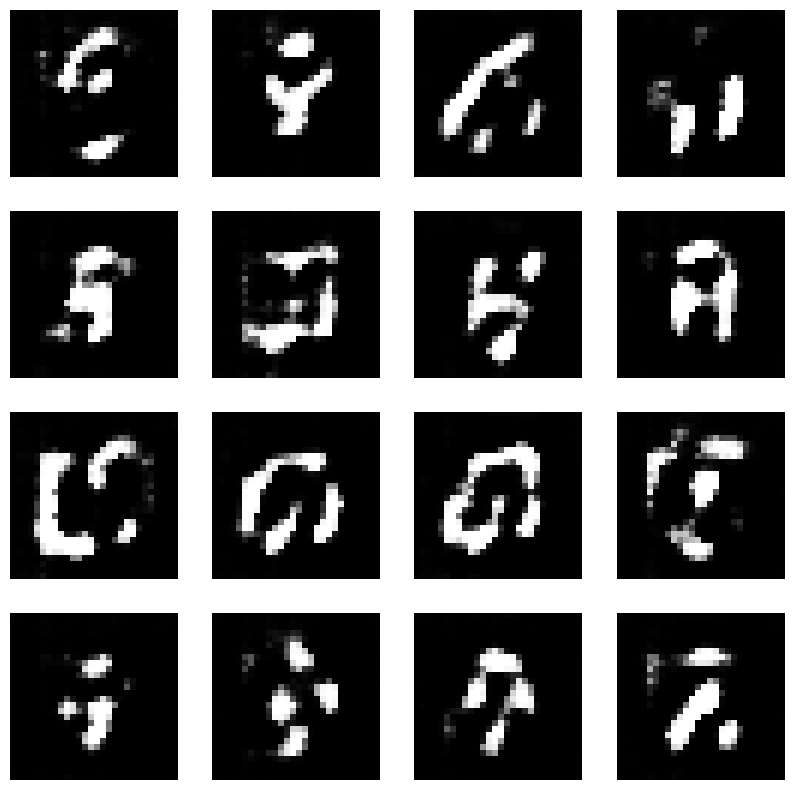

Epoch:  24


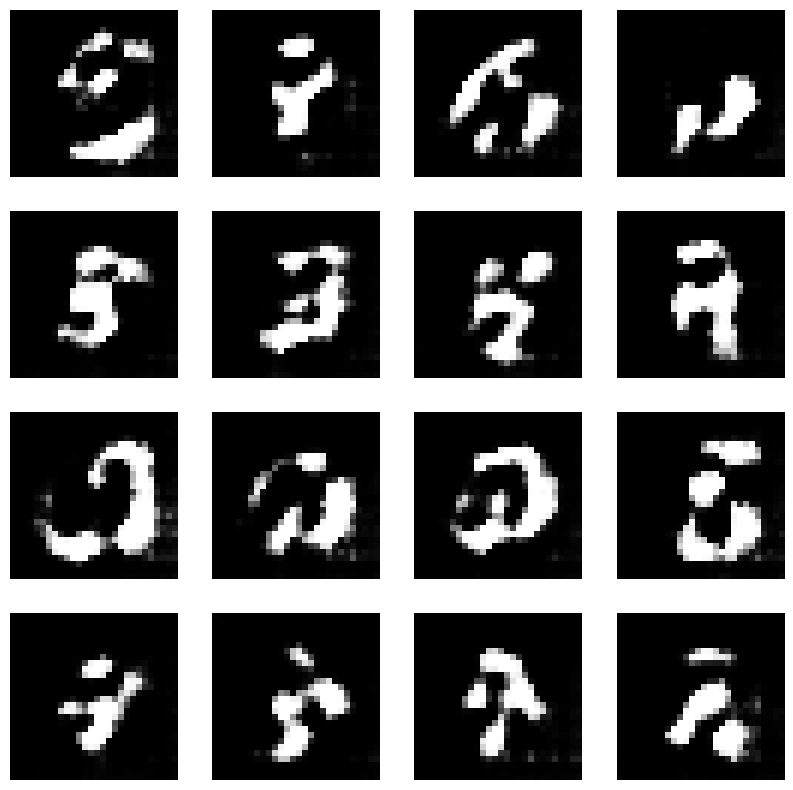

Epoch:  25


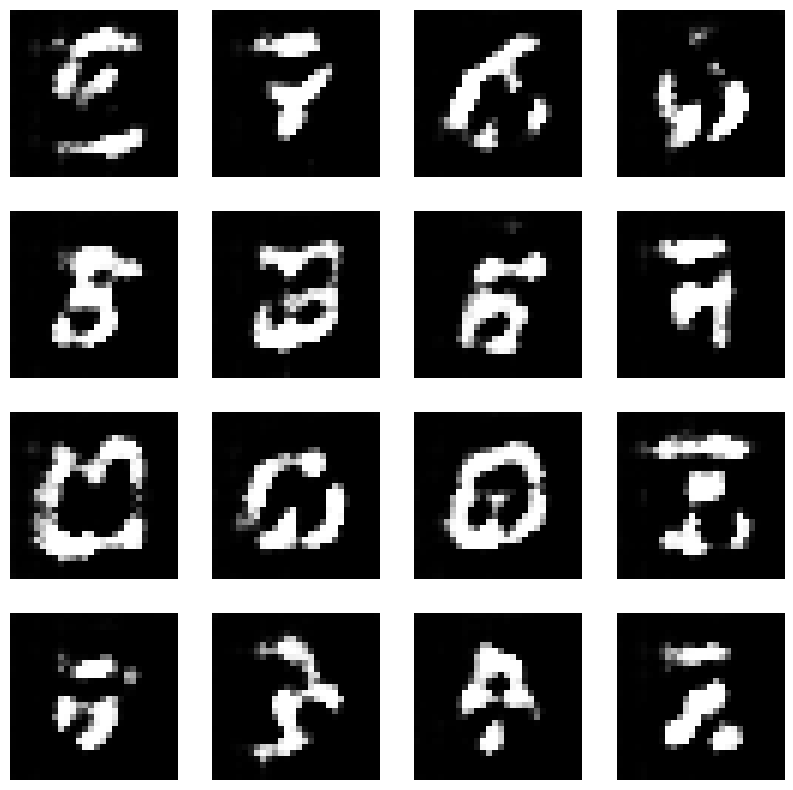

Epoch:  26


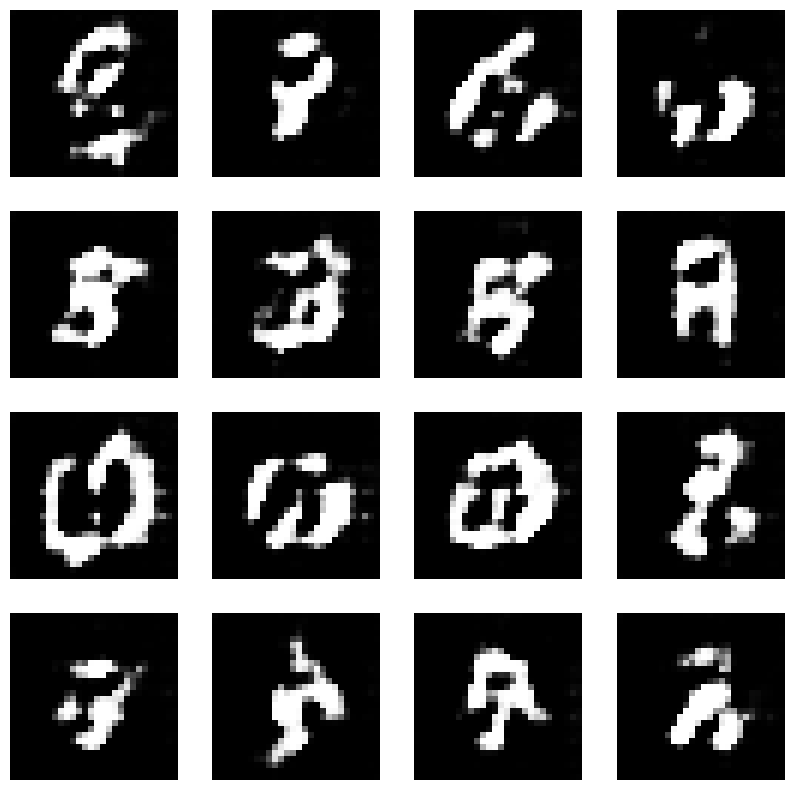

Epoch:  27


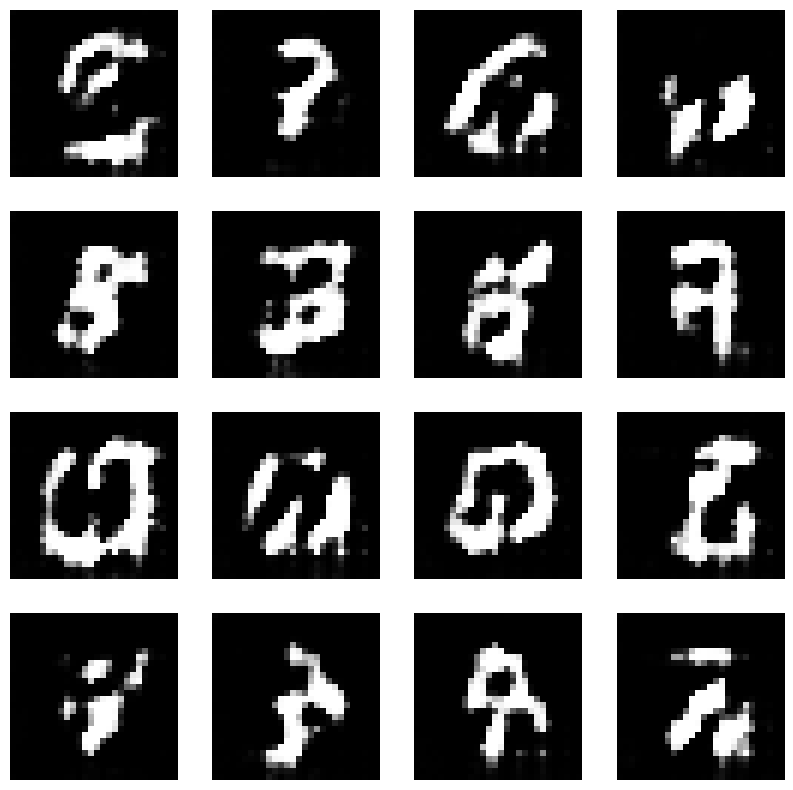

Epoch:  28


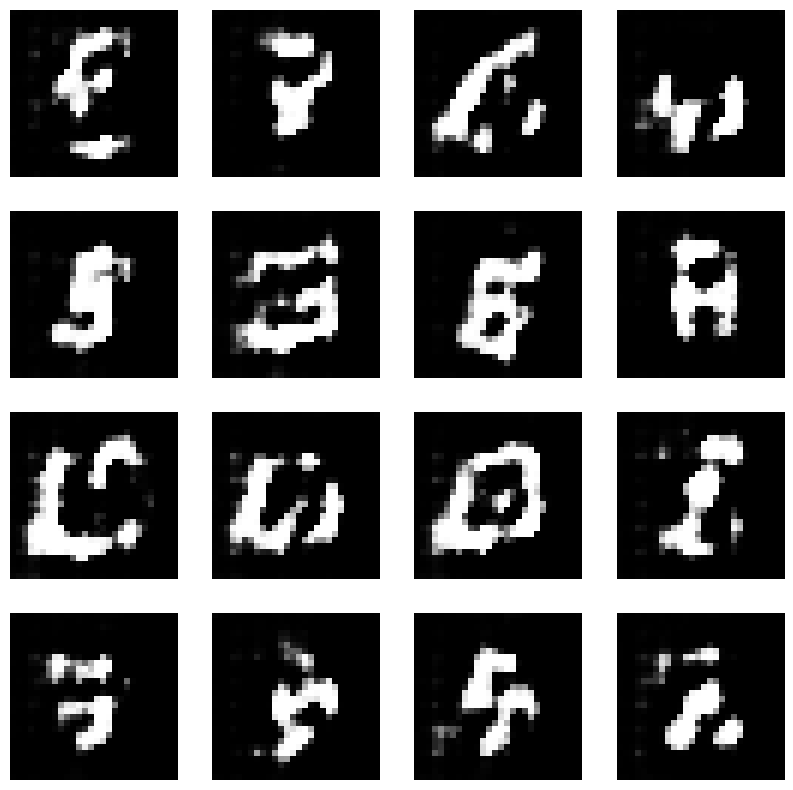

Epoch:  29


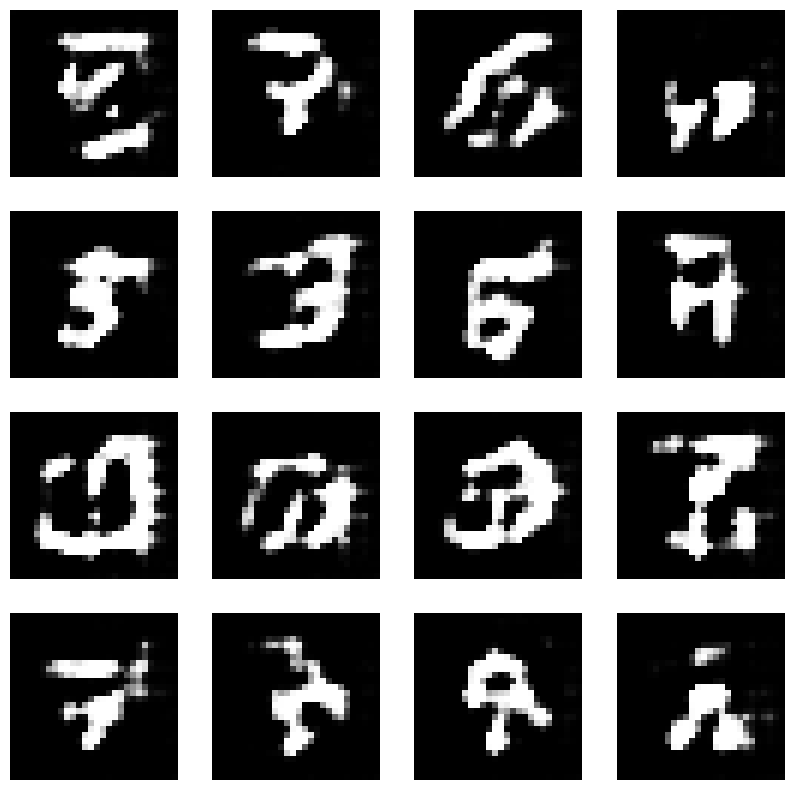

Epoch:  30


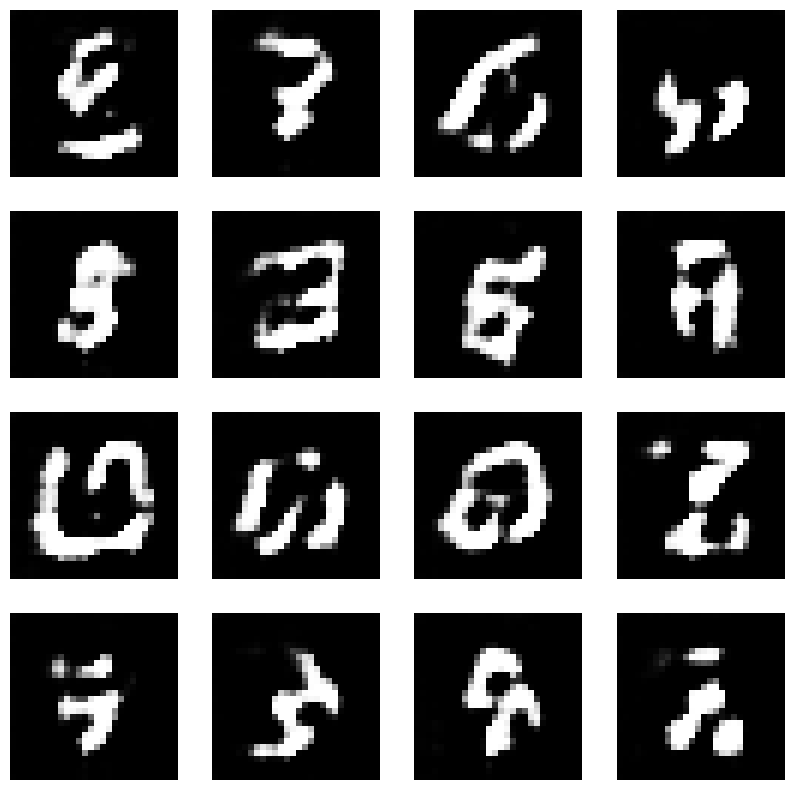

Epoch:  31


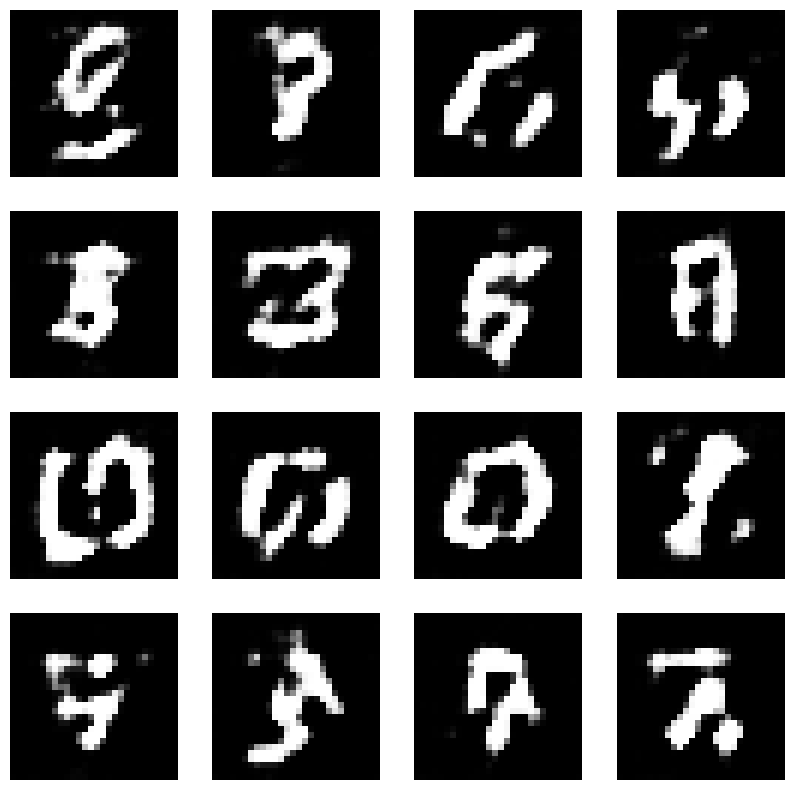

Epoch:  32


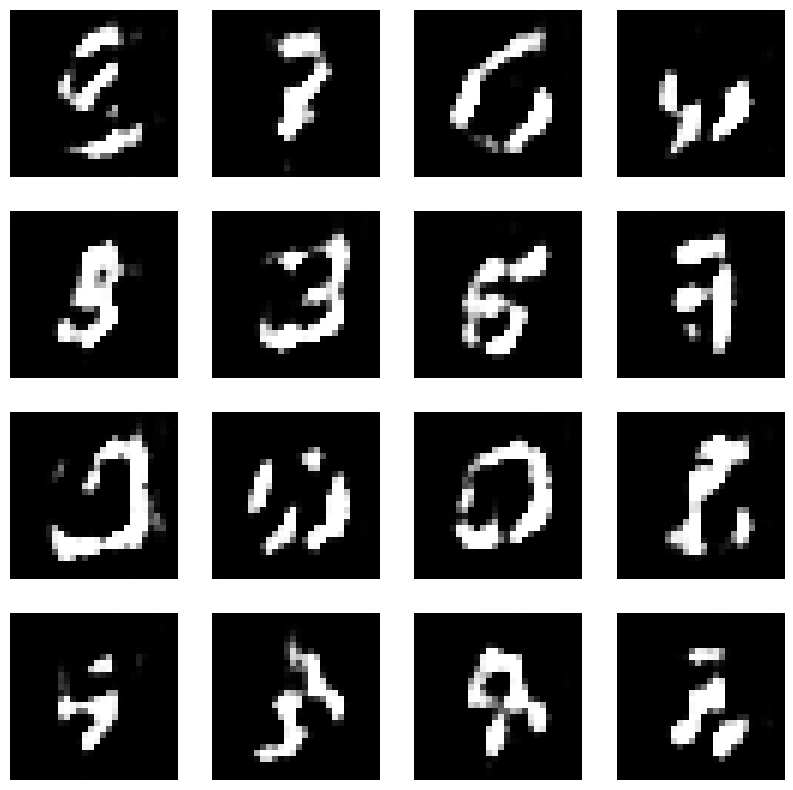

Epoch:  33


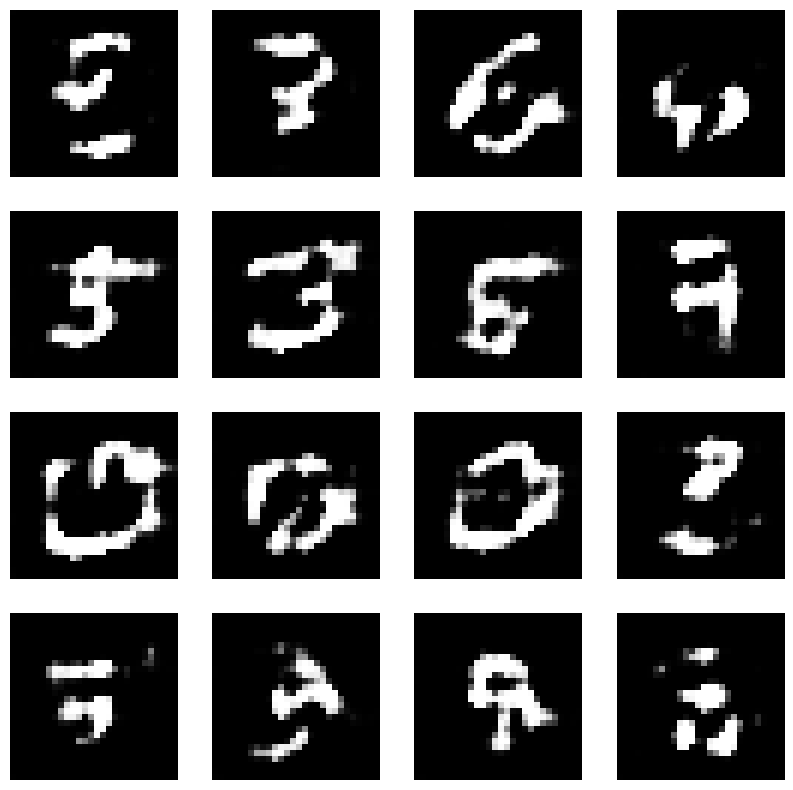

Epoch:  34


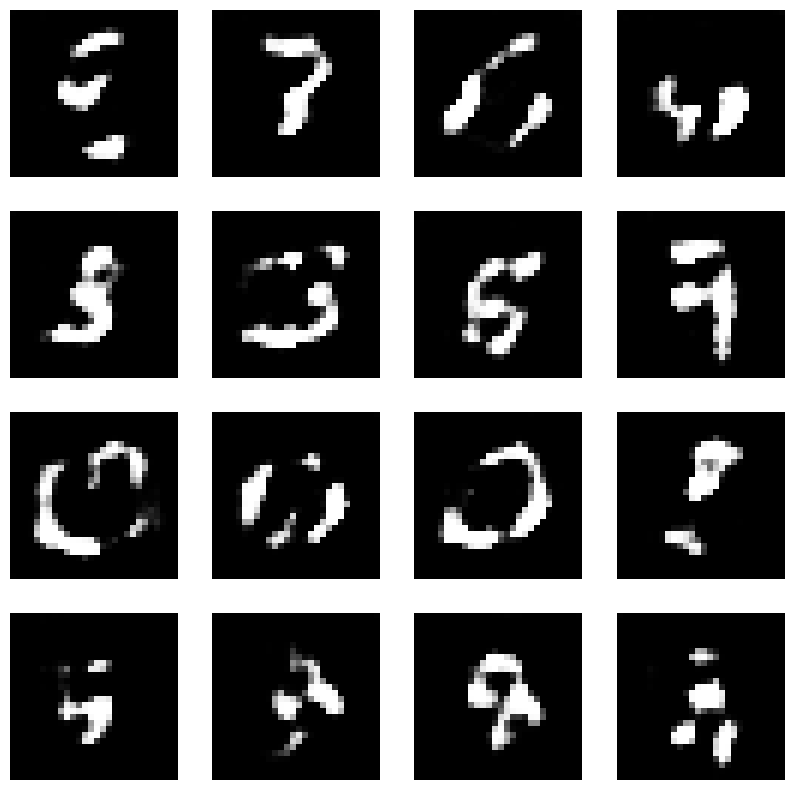

Epoch:  35


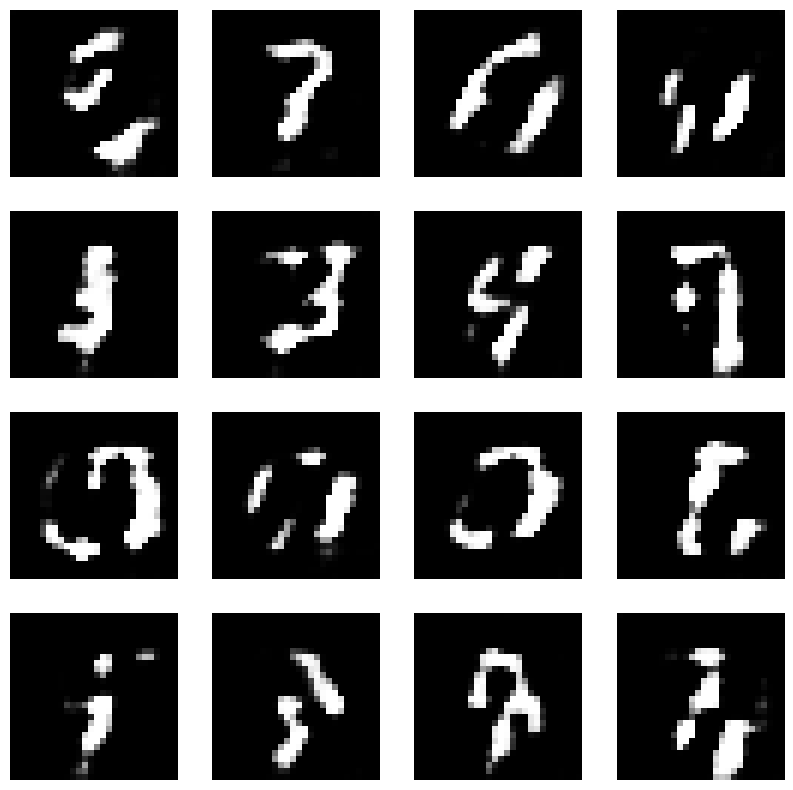

Epoch:  36


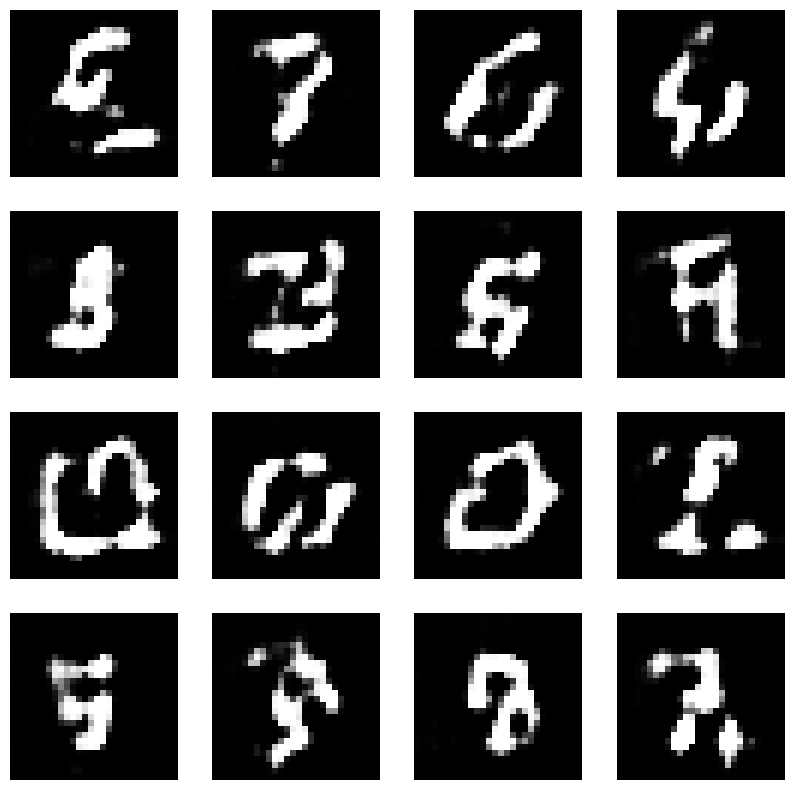

Epoch:  37


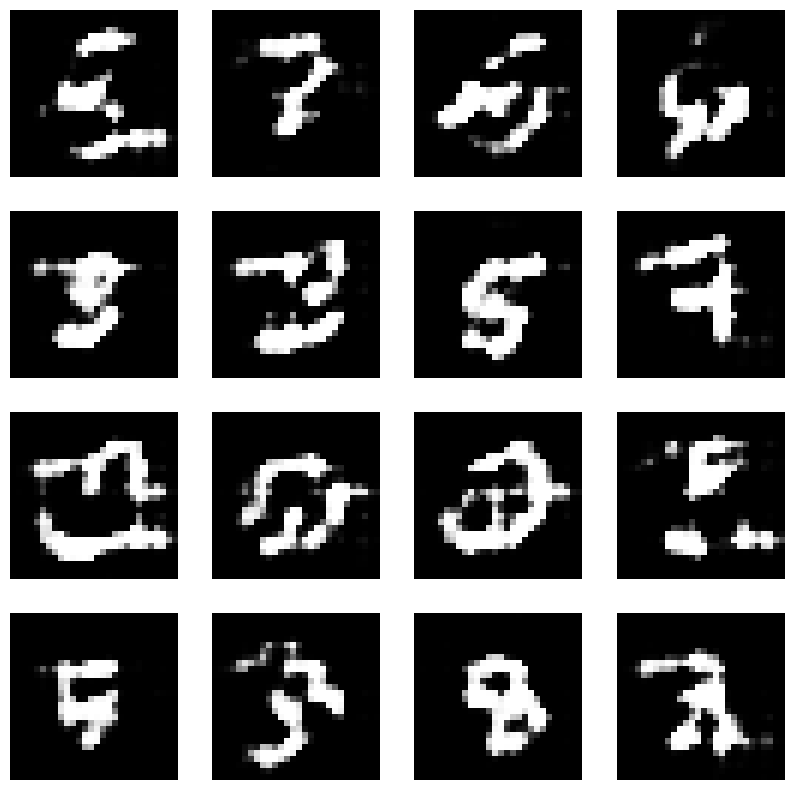

Epoch:  38


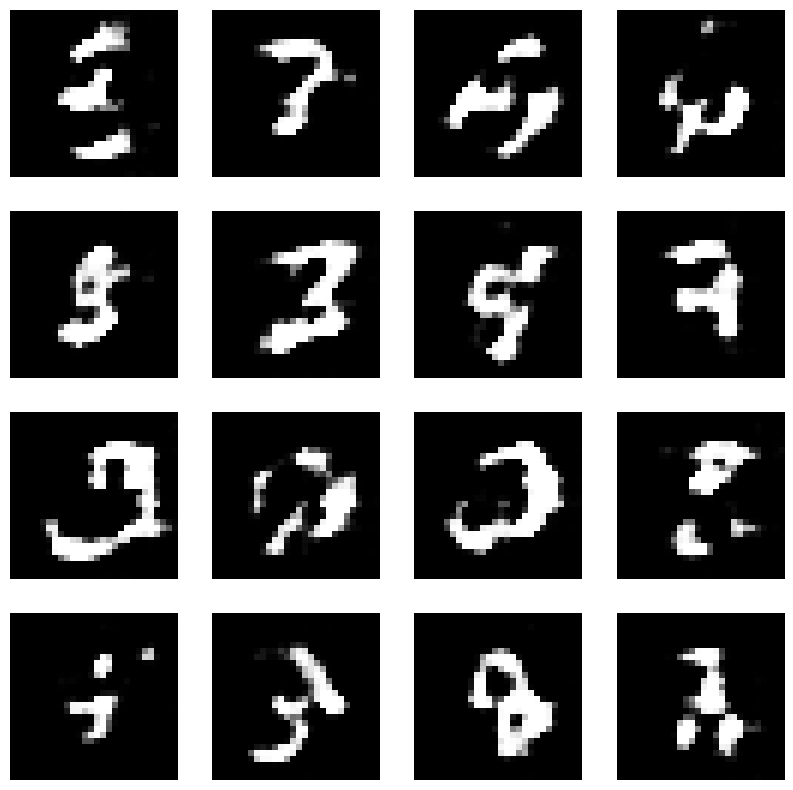

Epoch:  39


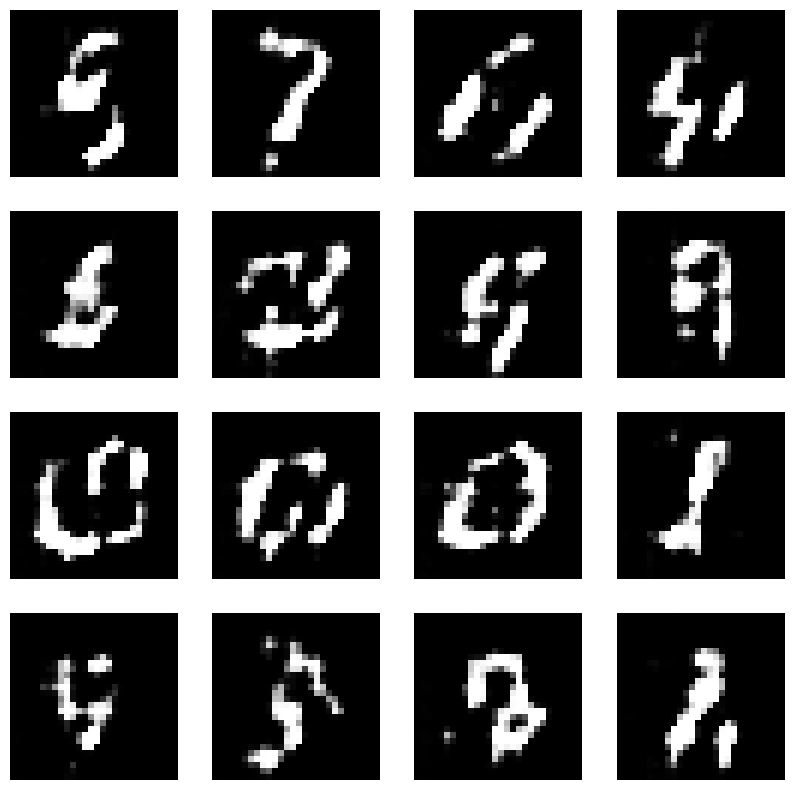

Epoch:  40


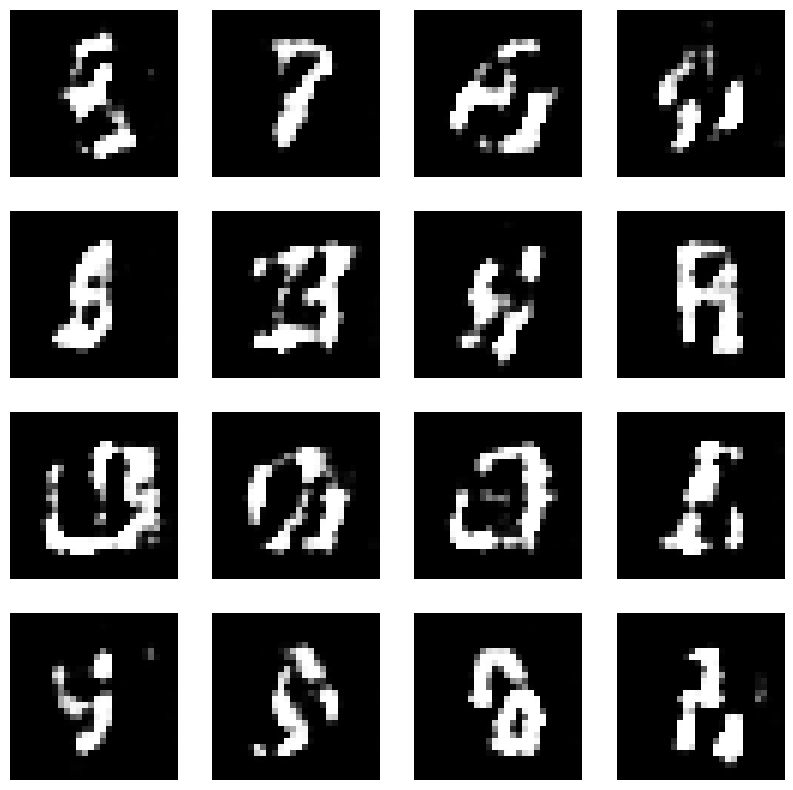

Epoch:  41


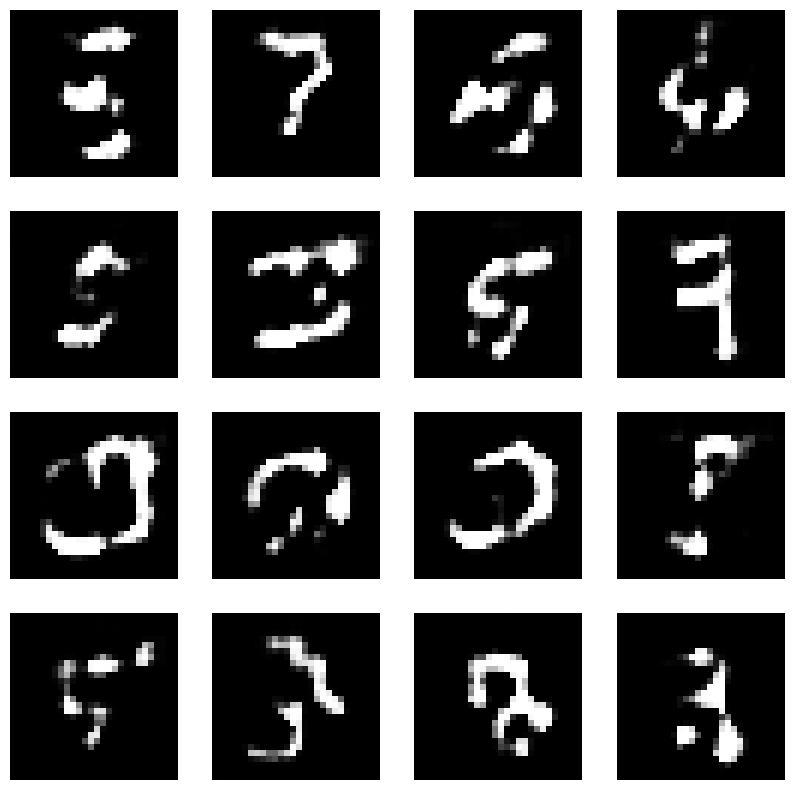

Epoch:  42


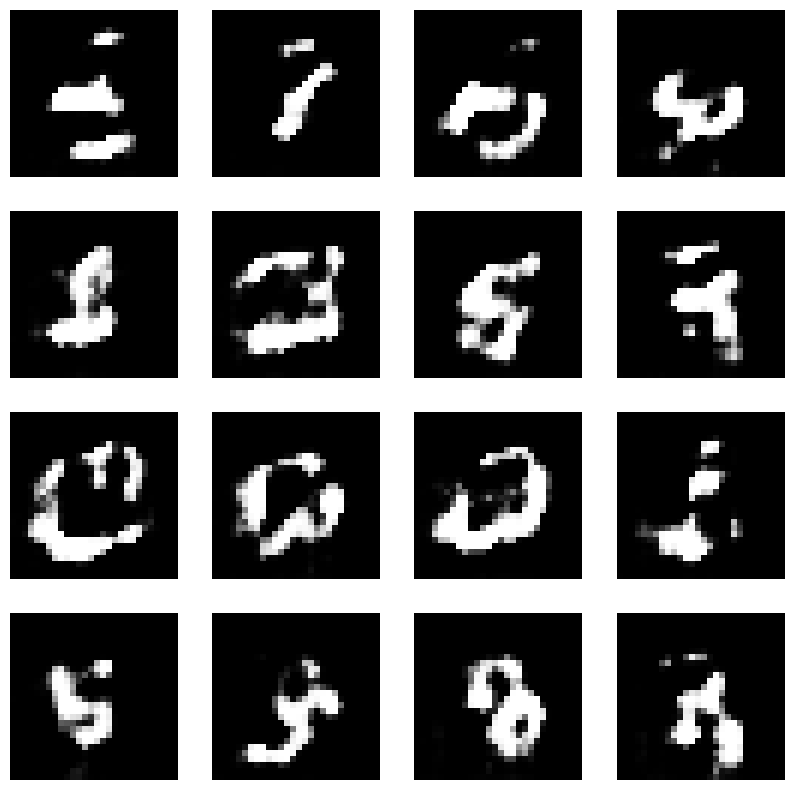

Epoch:  43


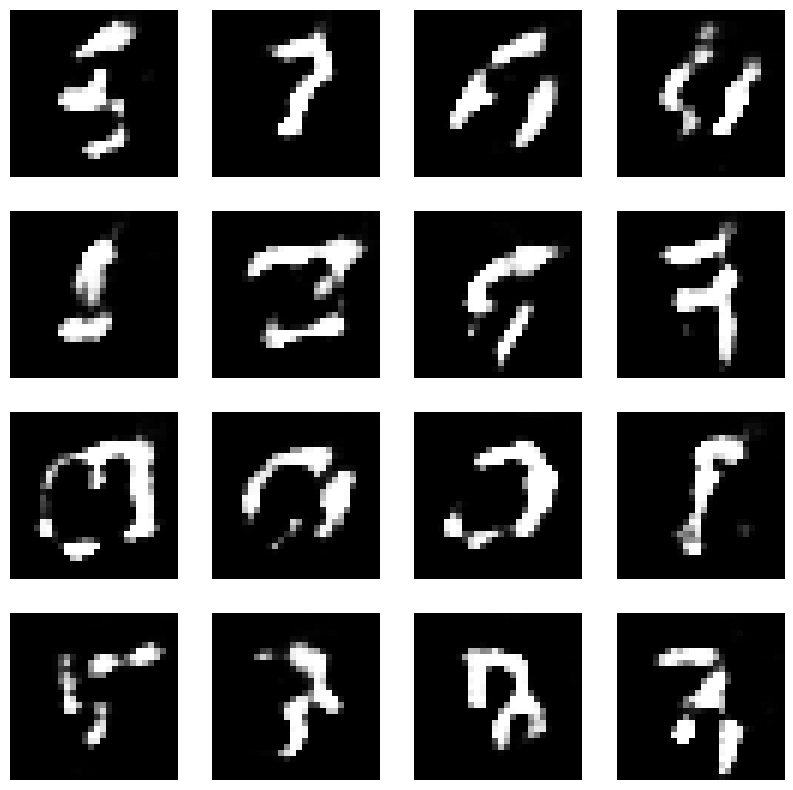

Epoch:  44


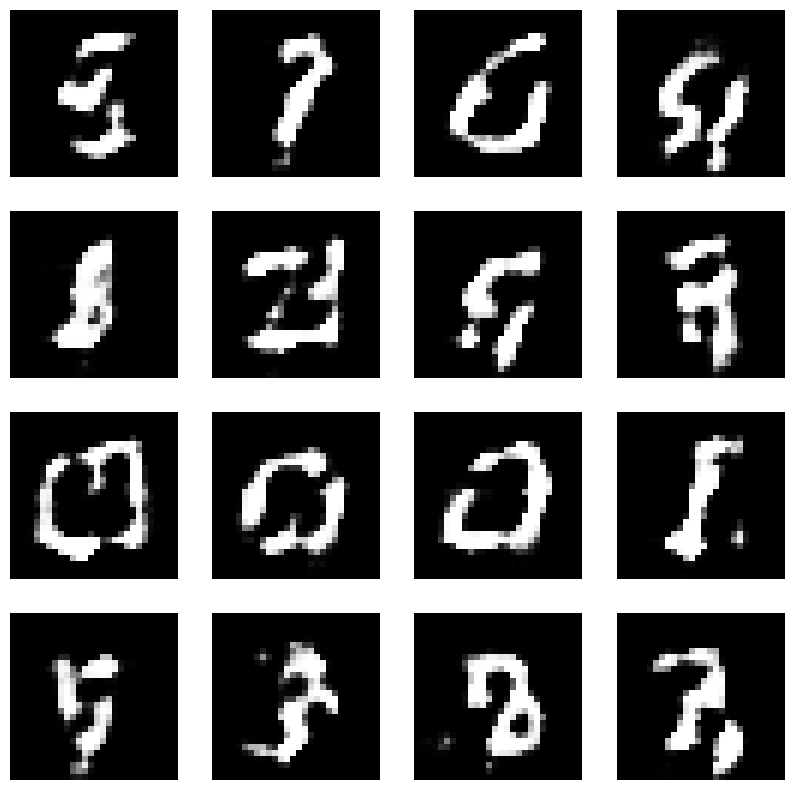

Epoch:  45


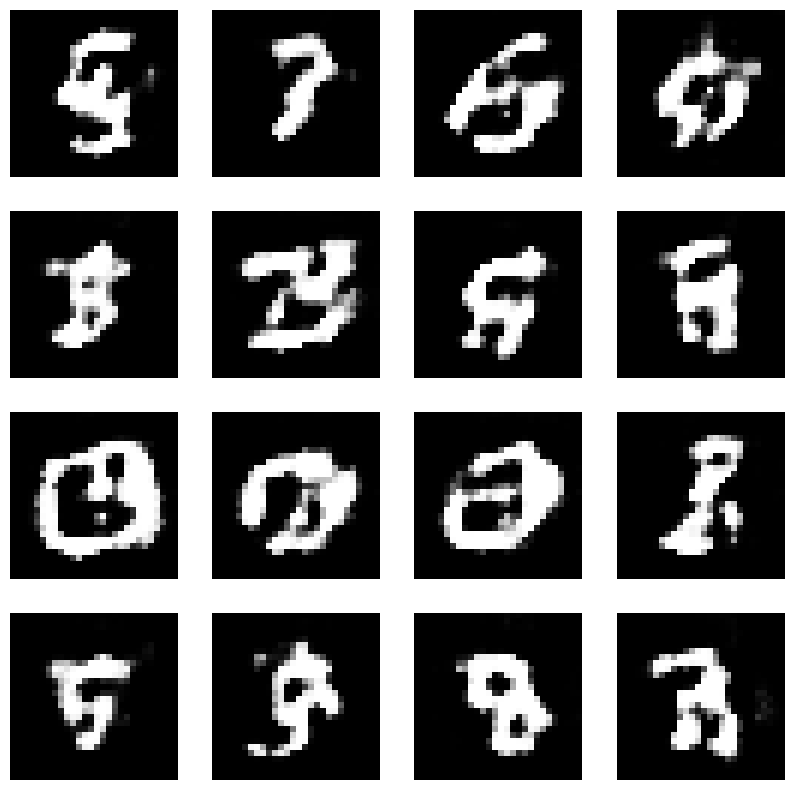

Epoch:  46


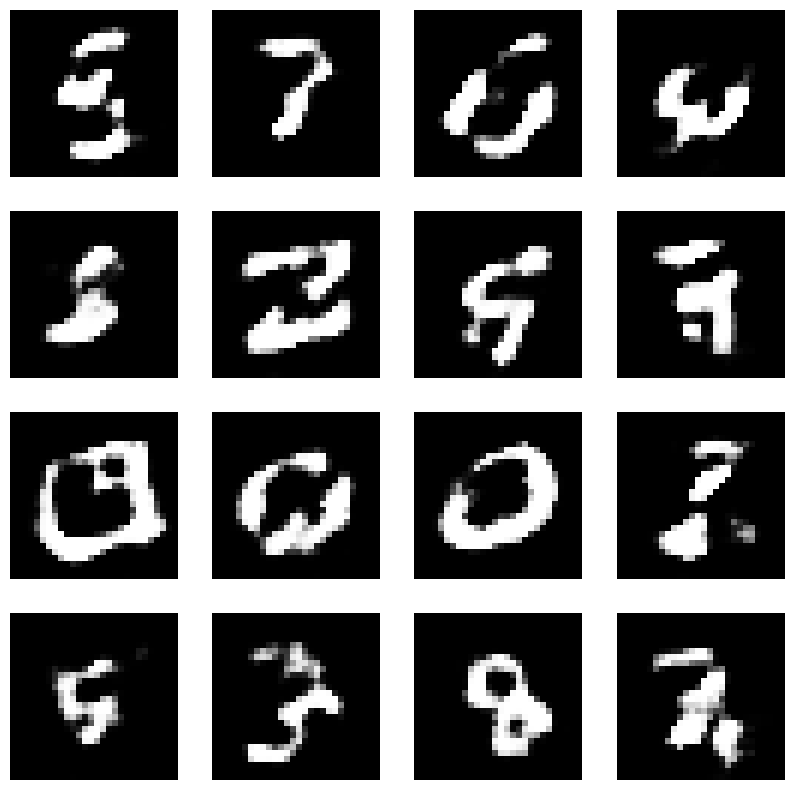

Epoch:  47


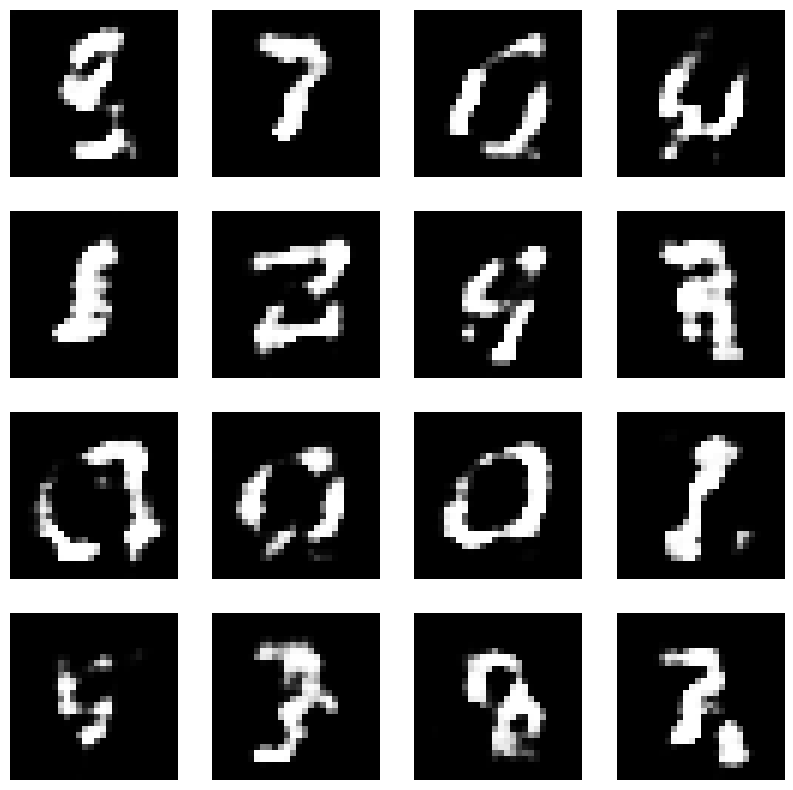

Epoch:  48


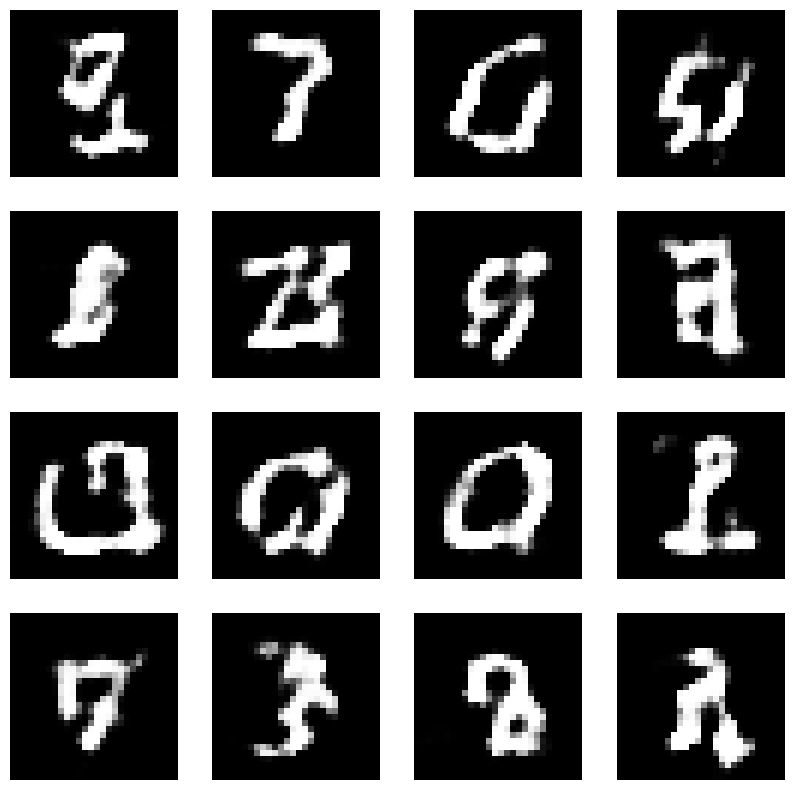

Epoch:  49


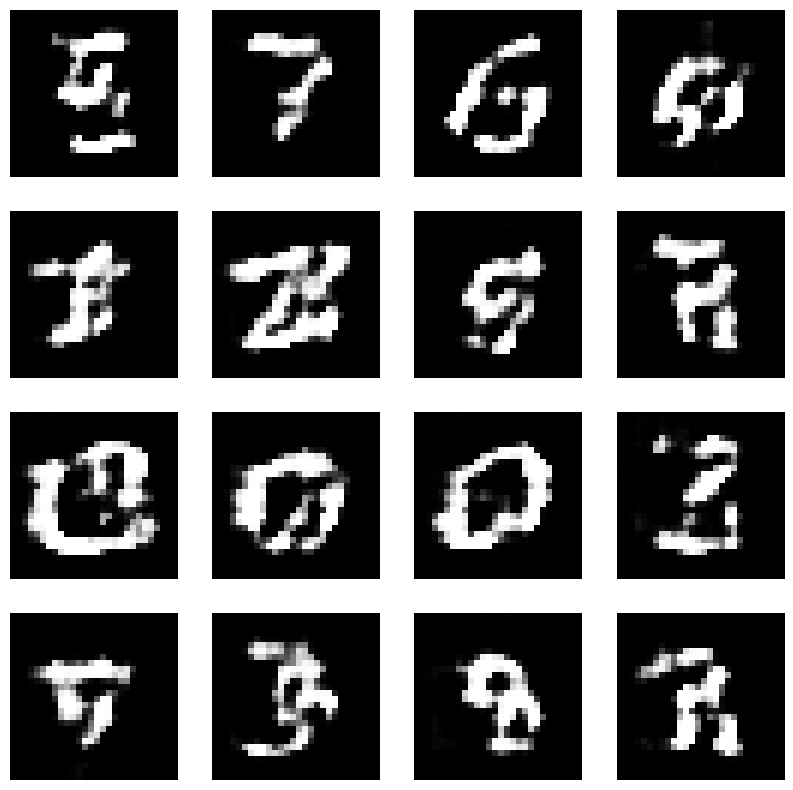

Epoch:  50


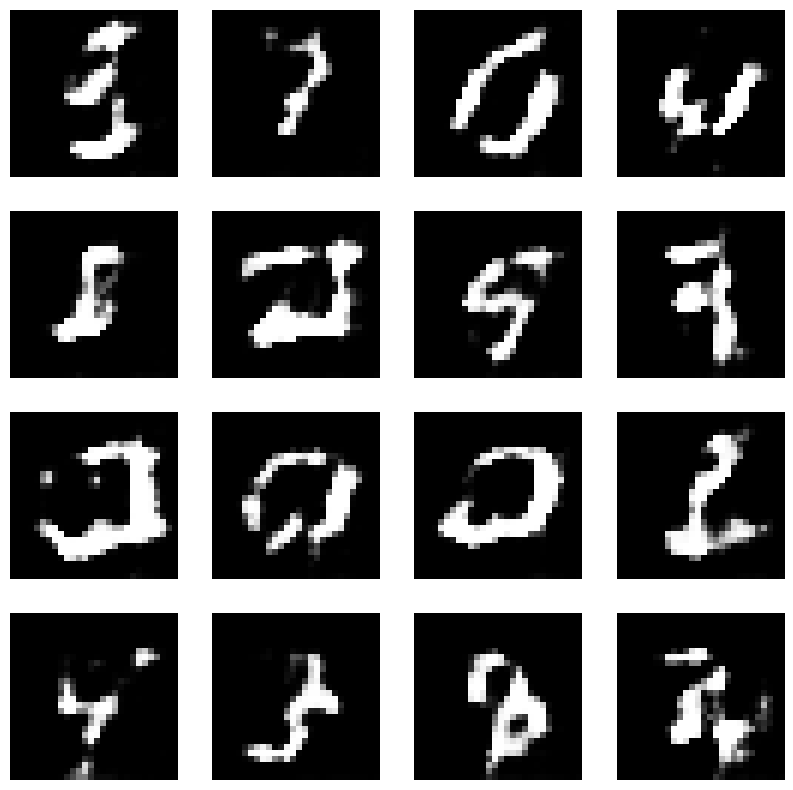

Epoch:  51


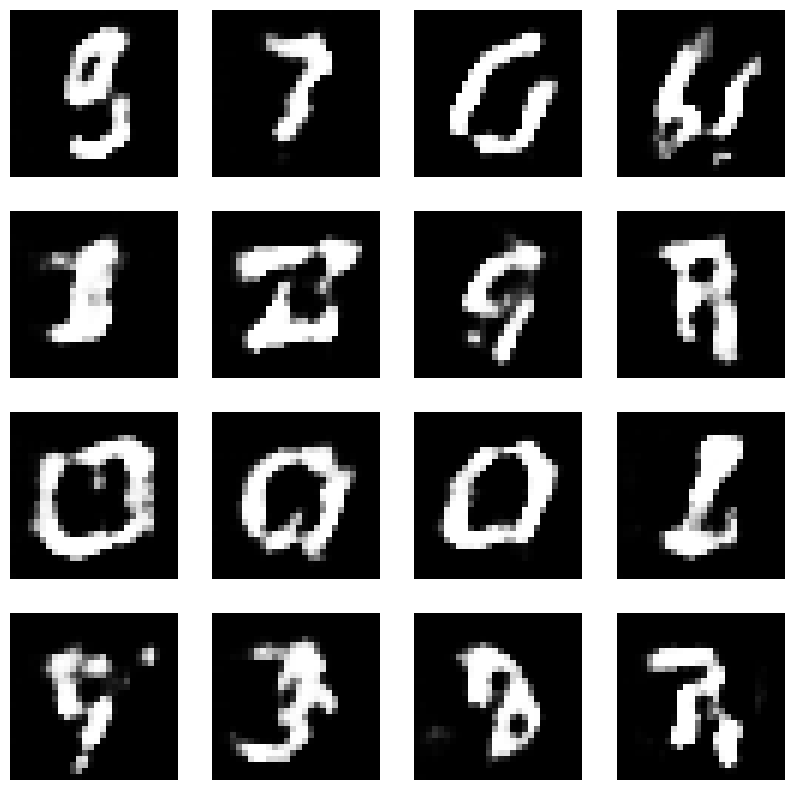

Epoch:  52


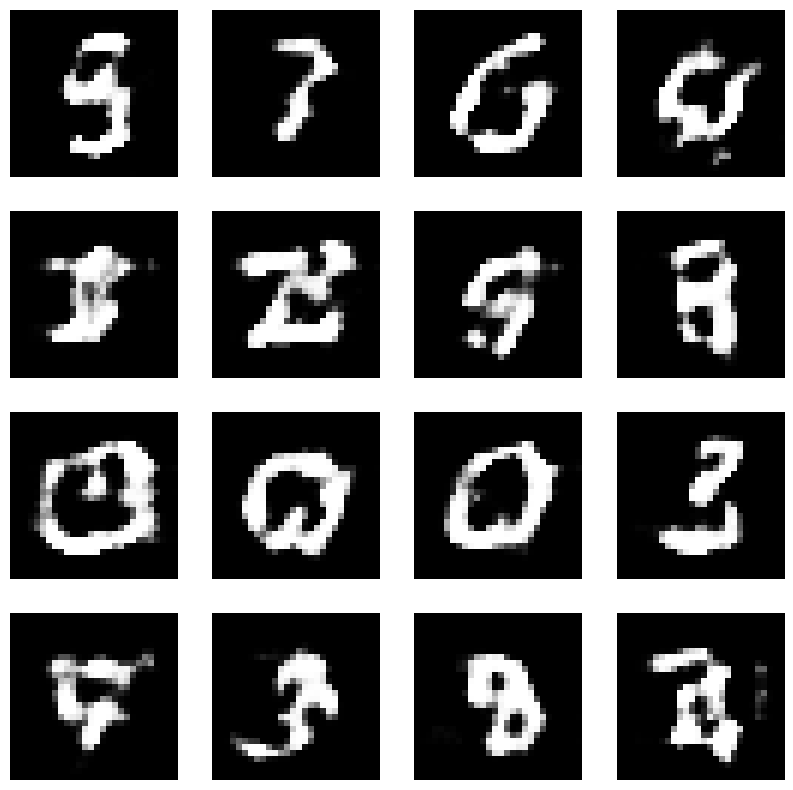

Epoch:  53


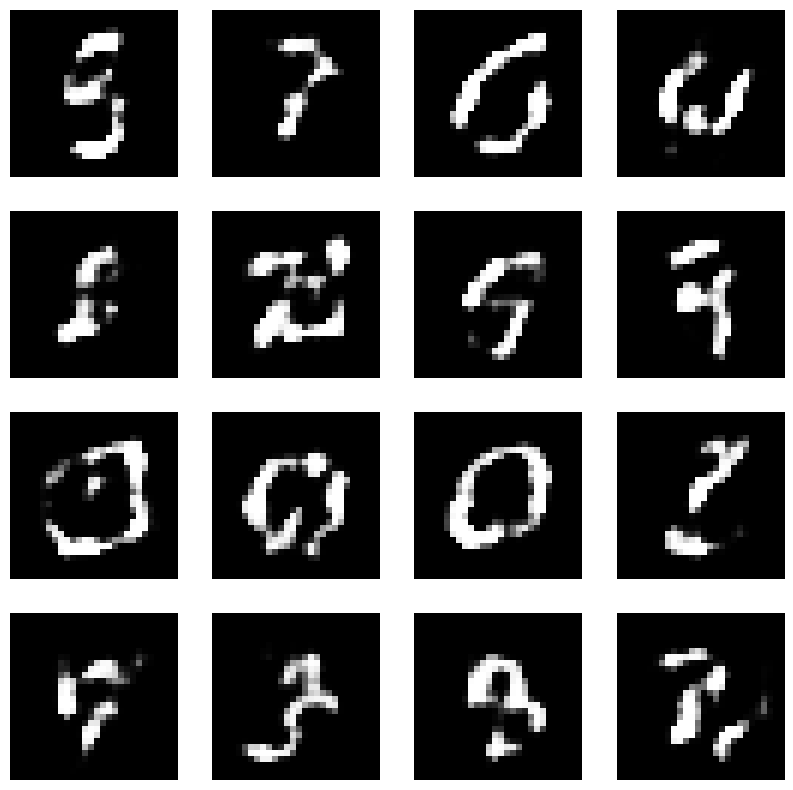

Epoch:  54


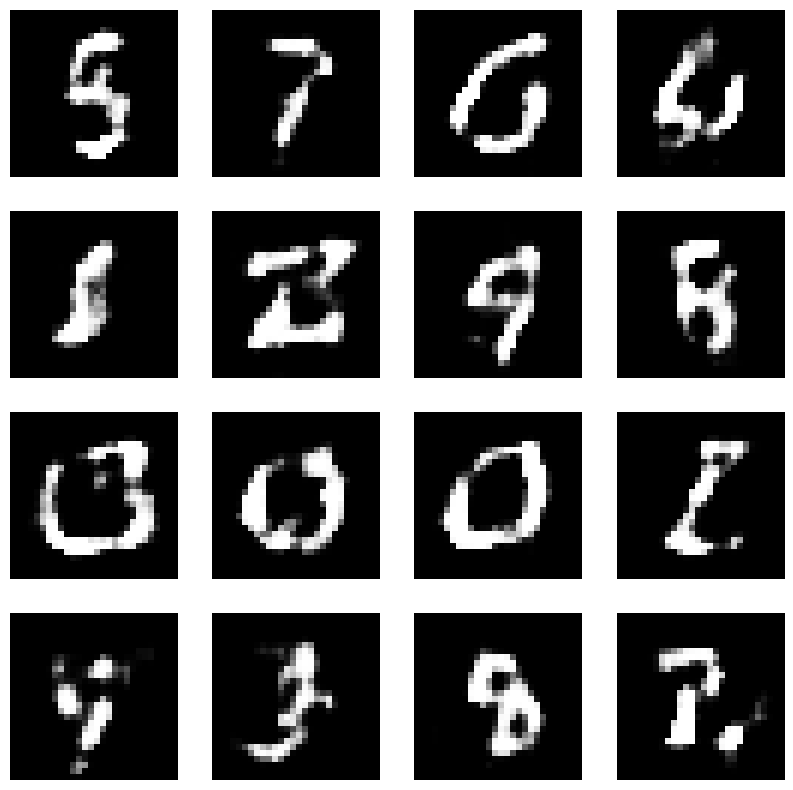

Epoch:  55


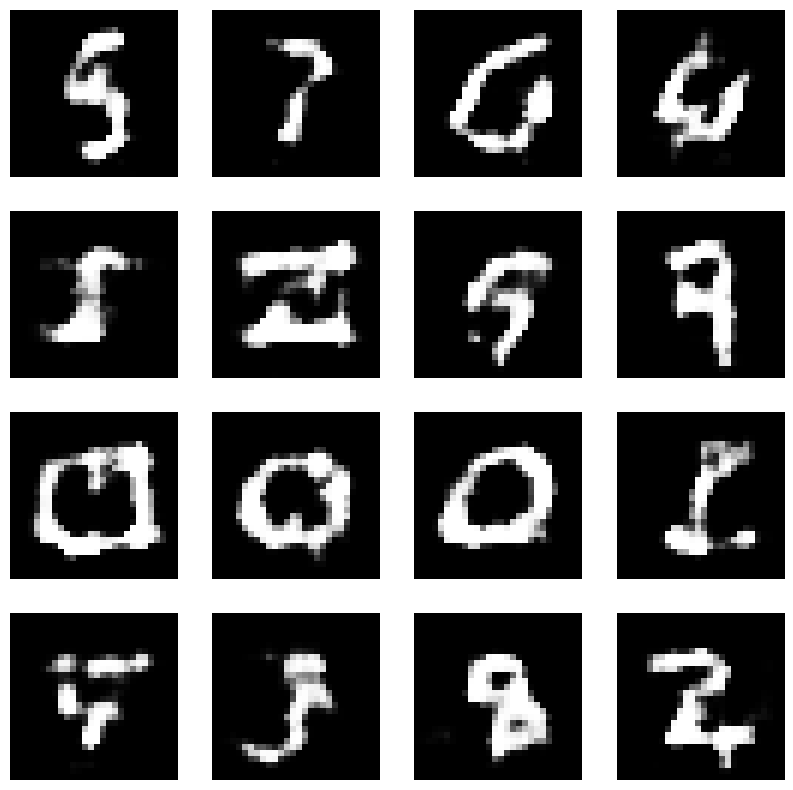

Epoch:  56


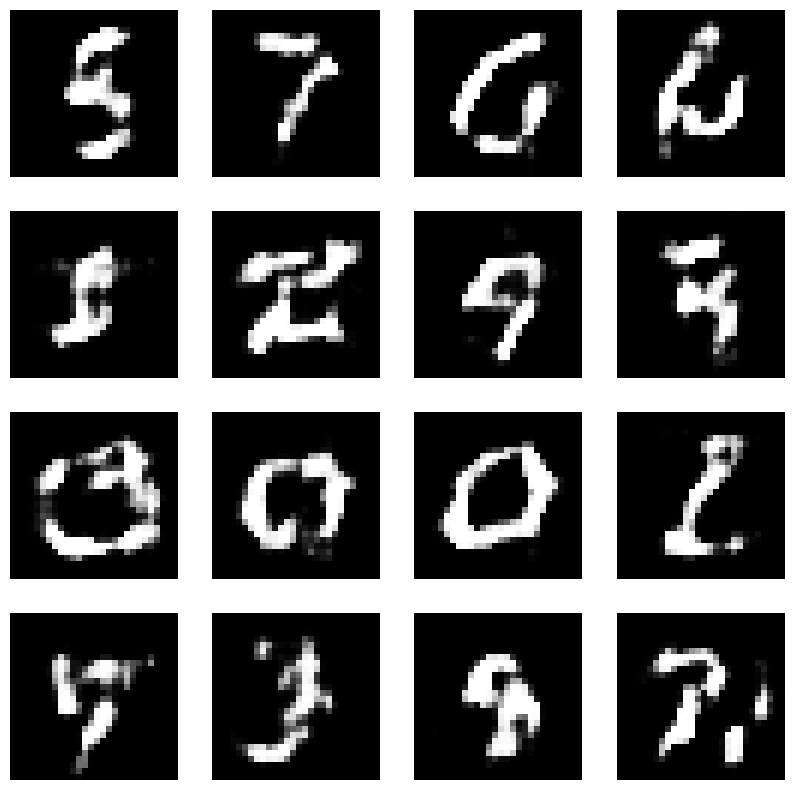

Epoch:  57


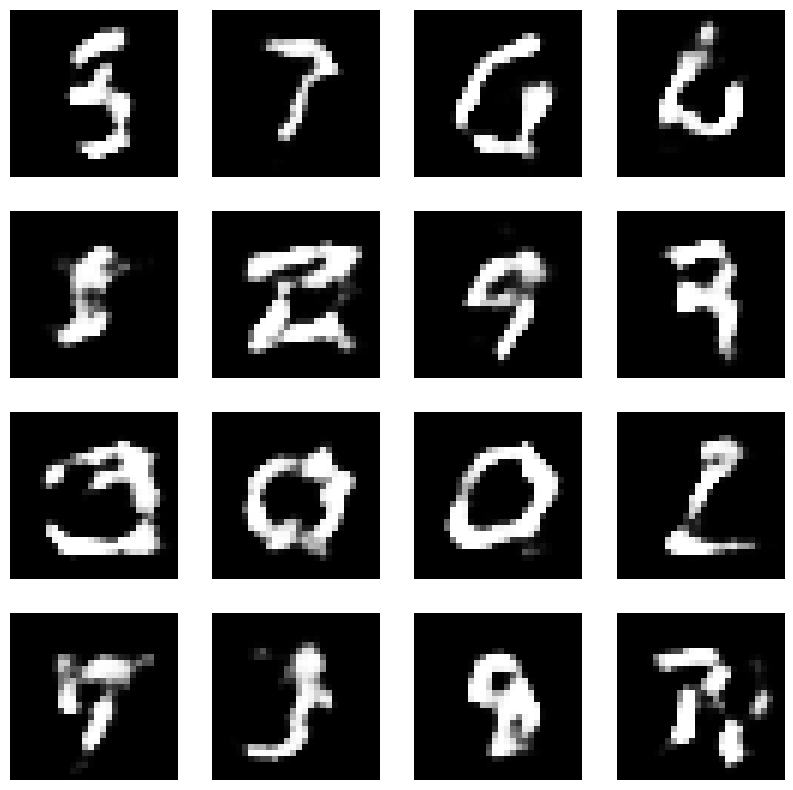

Epoch:  58


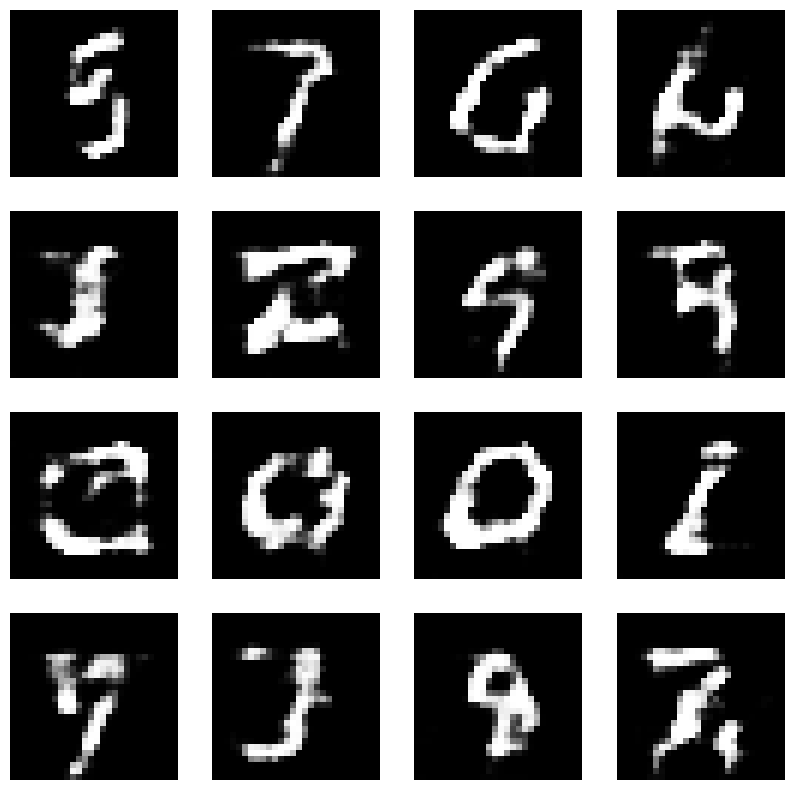

Epoch:  59


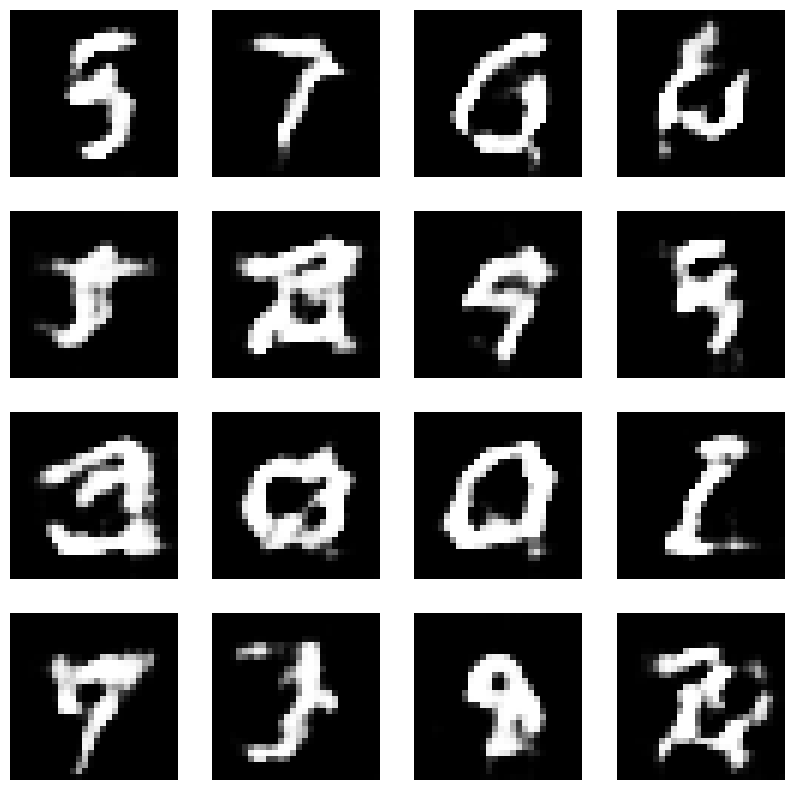

Epoch:  60


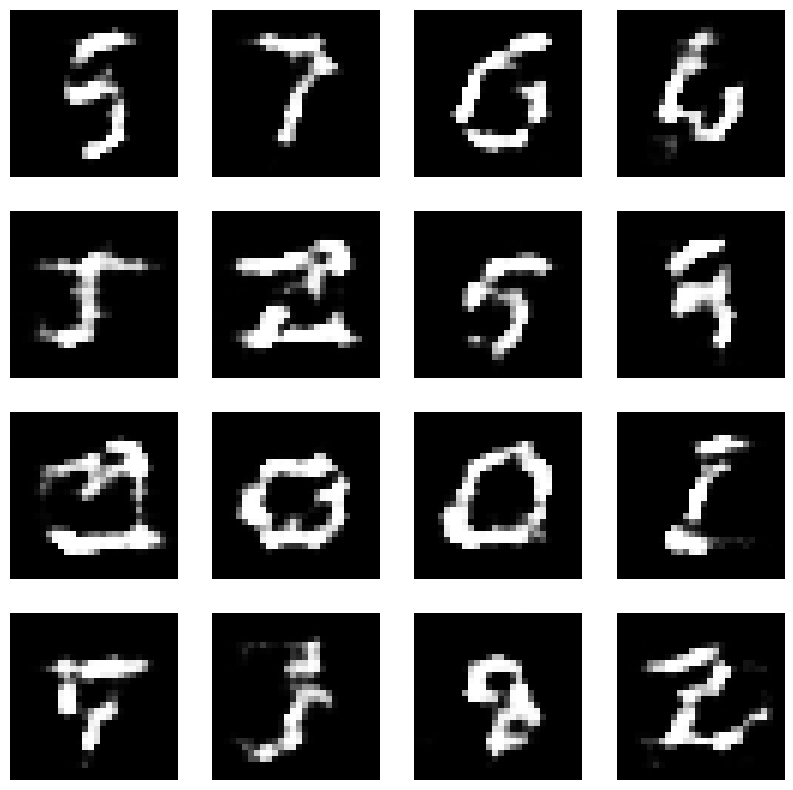

Epoch:  61


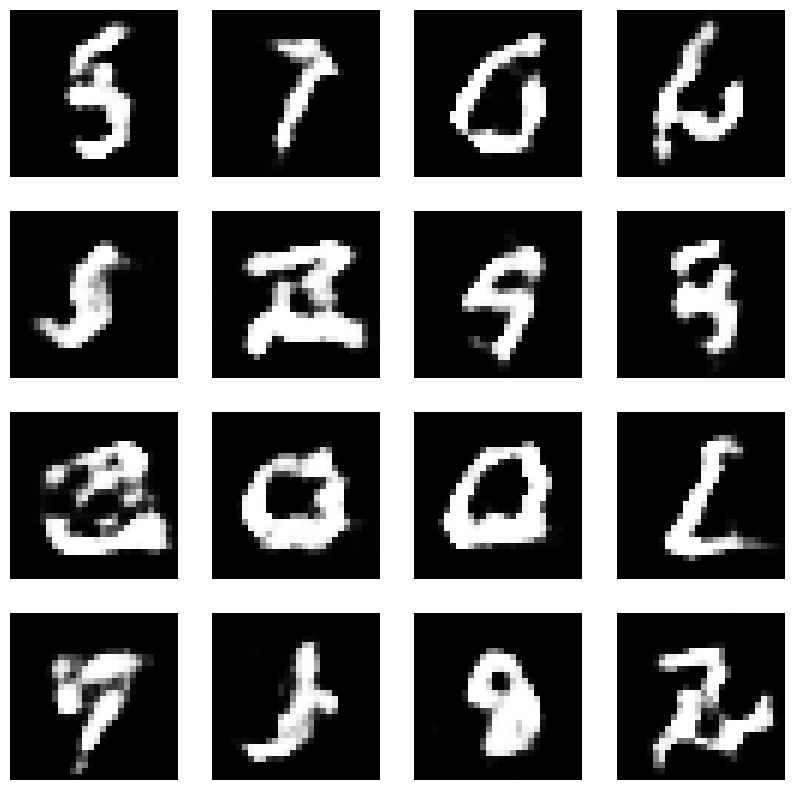

Epoch:  62


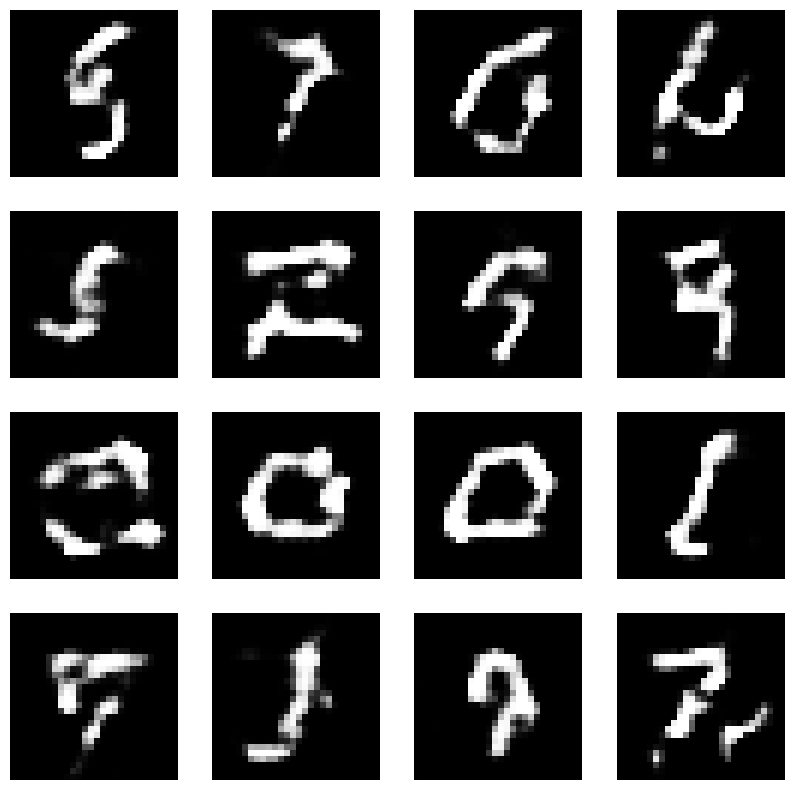

Epoch:  63


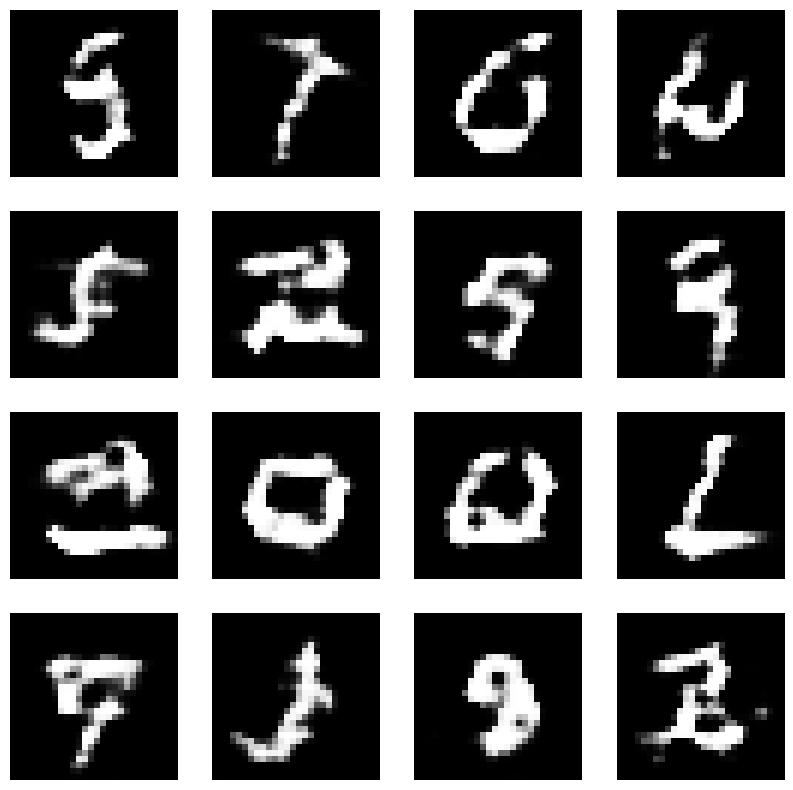

Epoch:  64


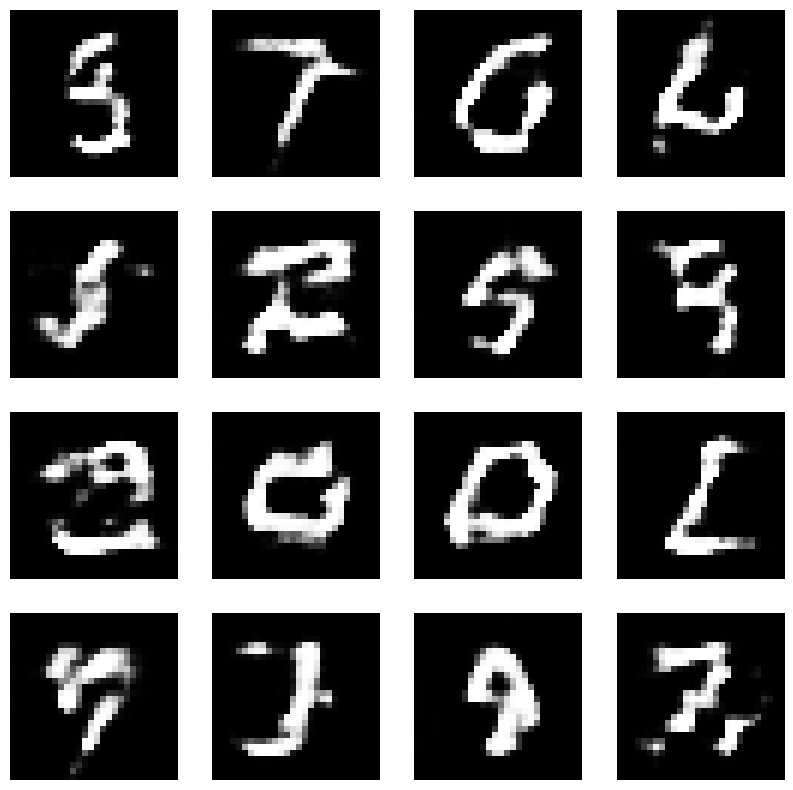

Epoch:  65


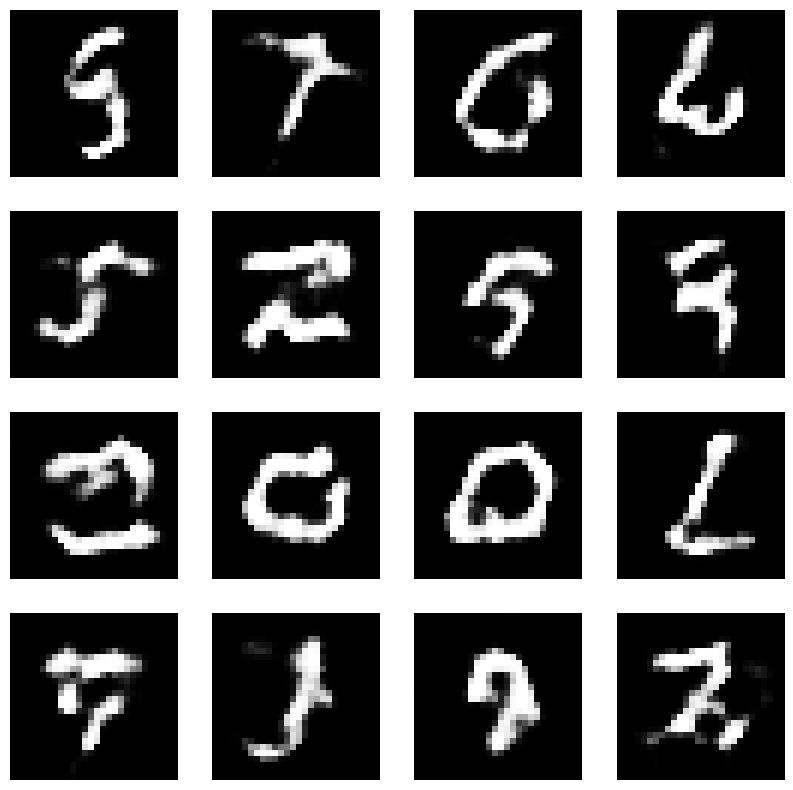

Epoch:  66


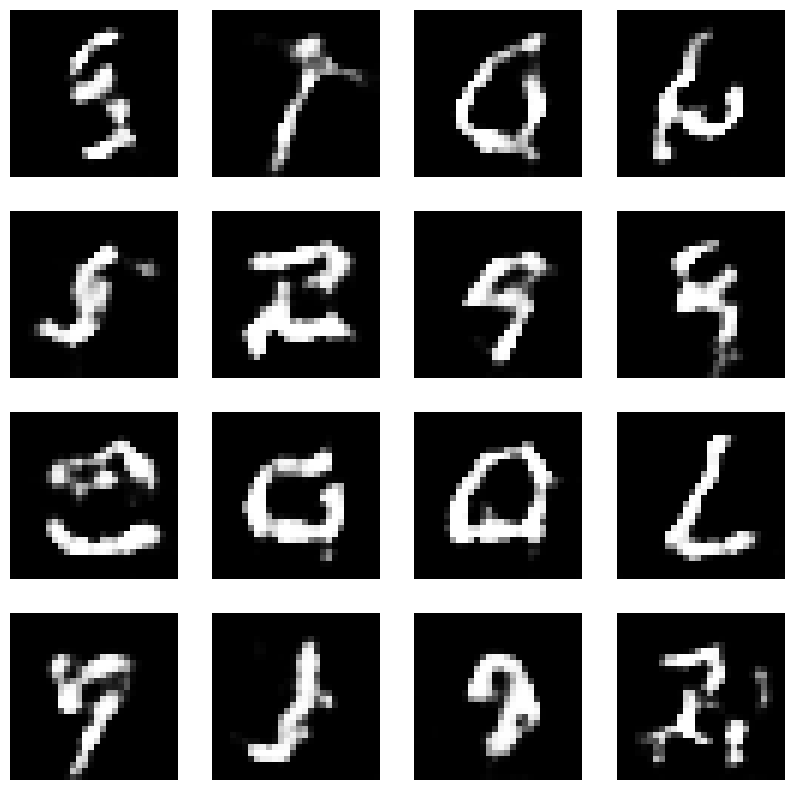

Epoch:  67


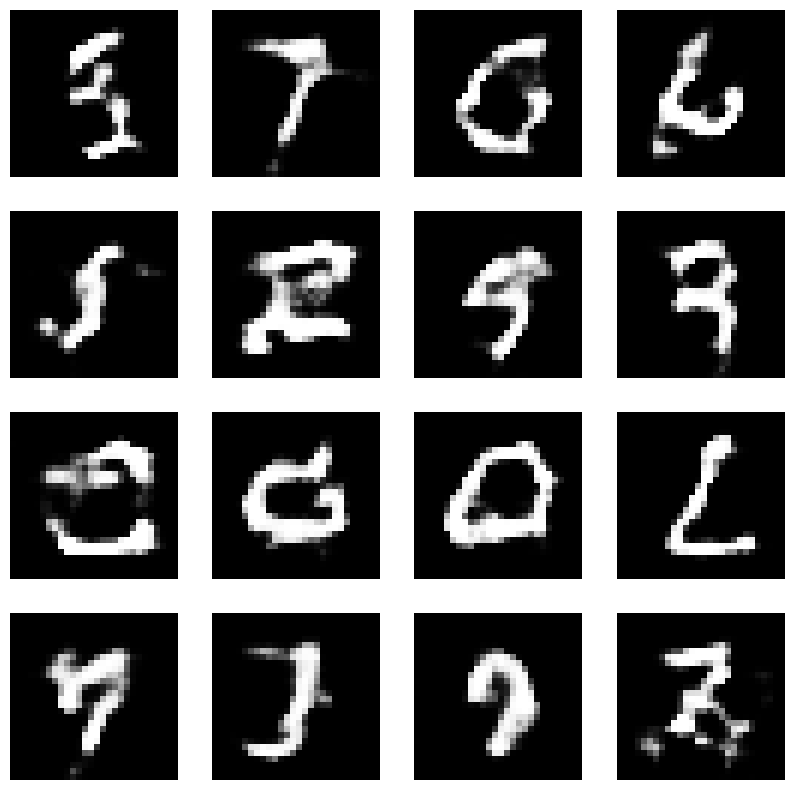

Epoch:  68


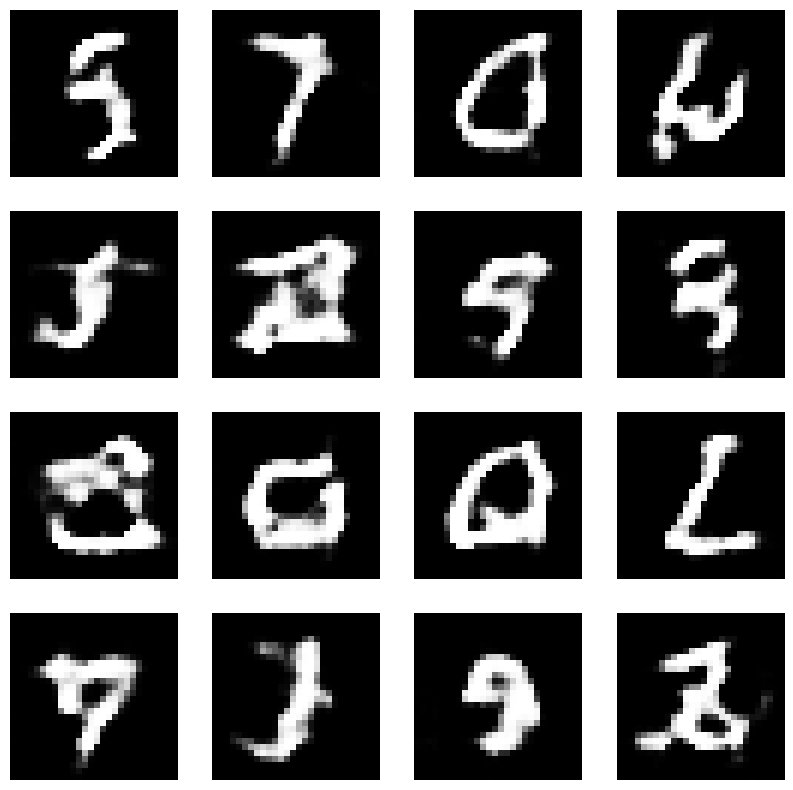

Epoch:  69


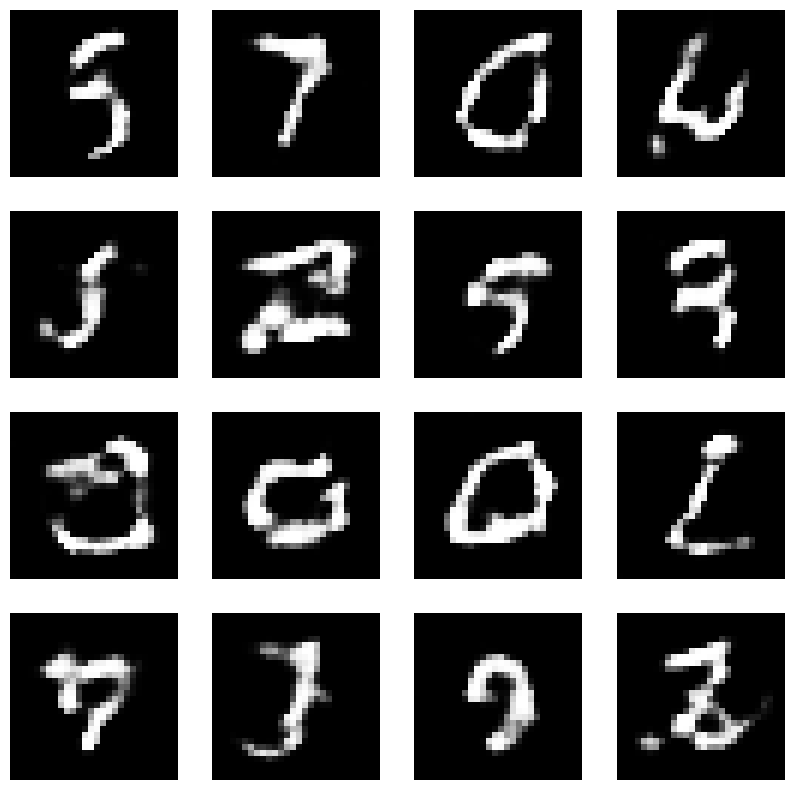

Epoch:  70


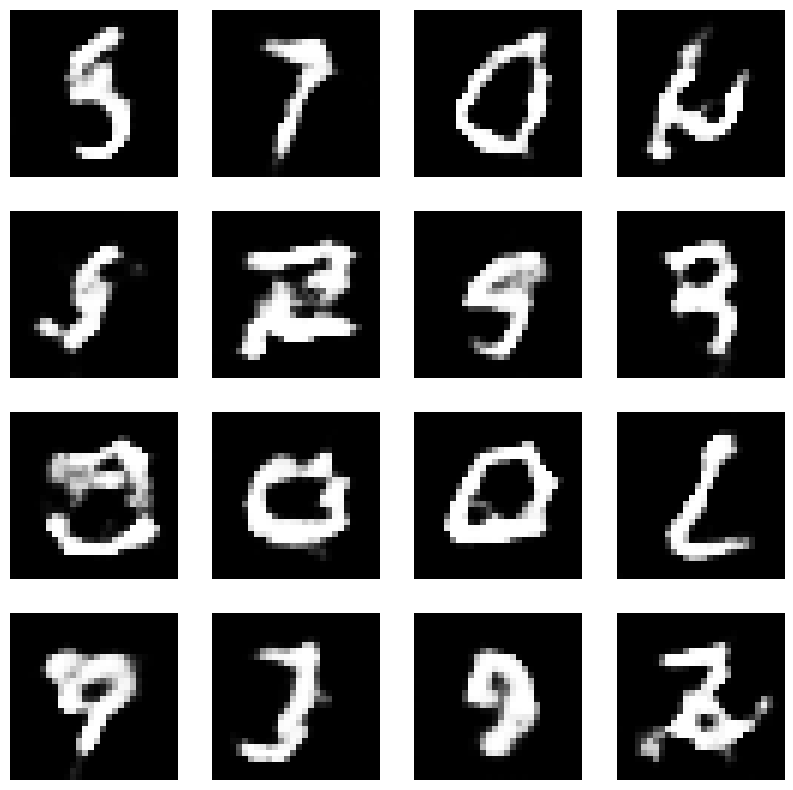

Epoch:  71


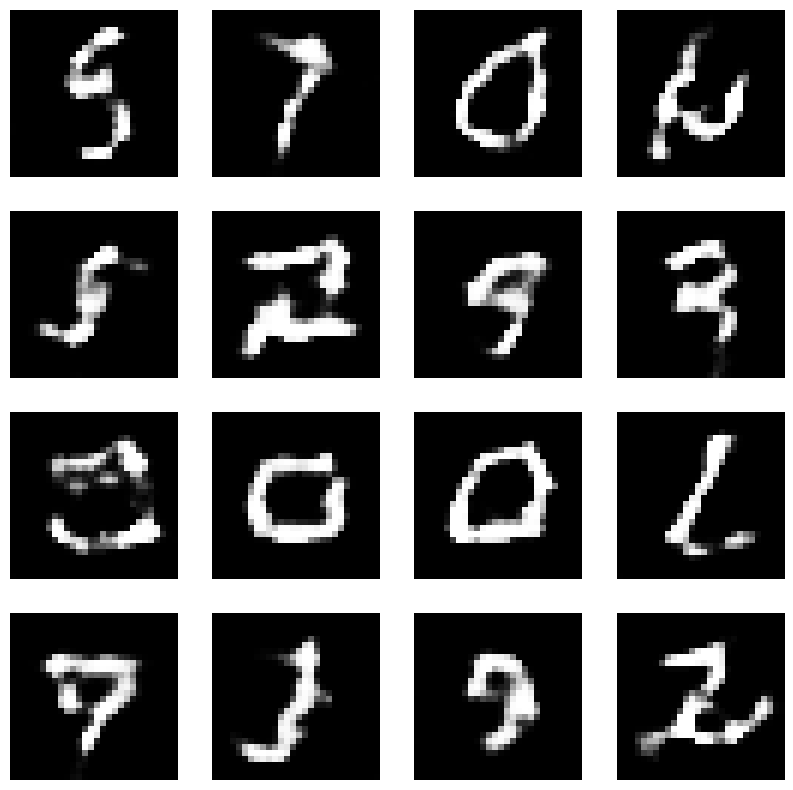

Epoch:  72


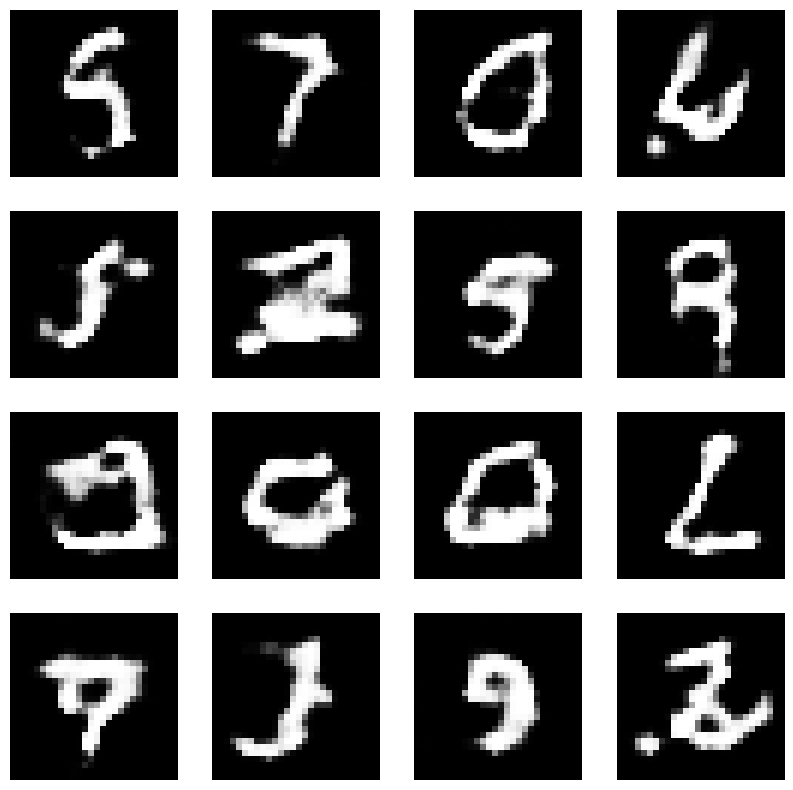

Epoch:  73


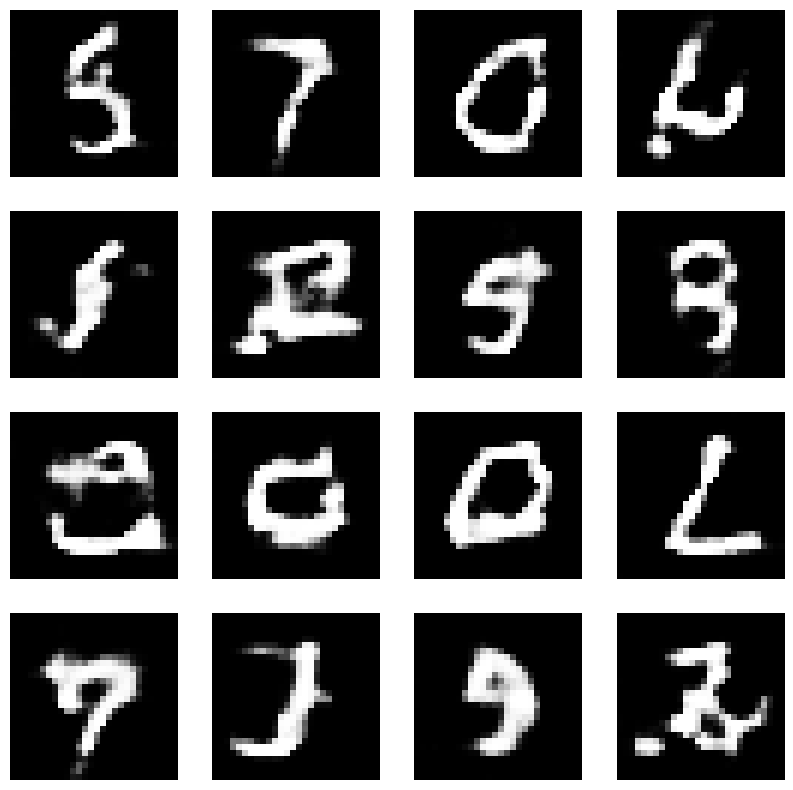

Epoch:  74


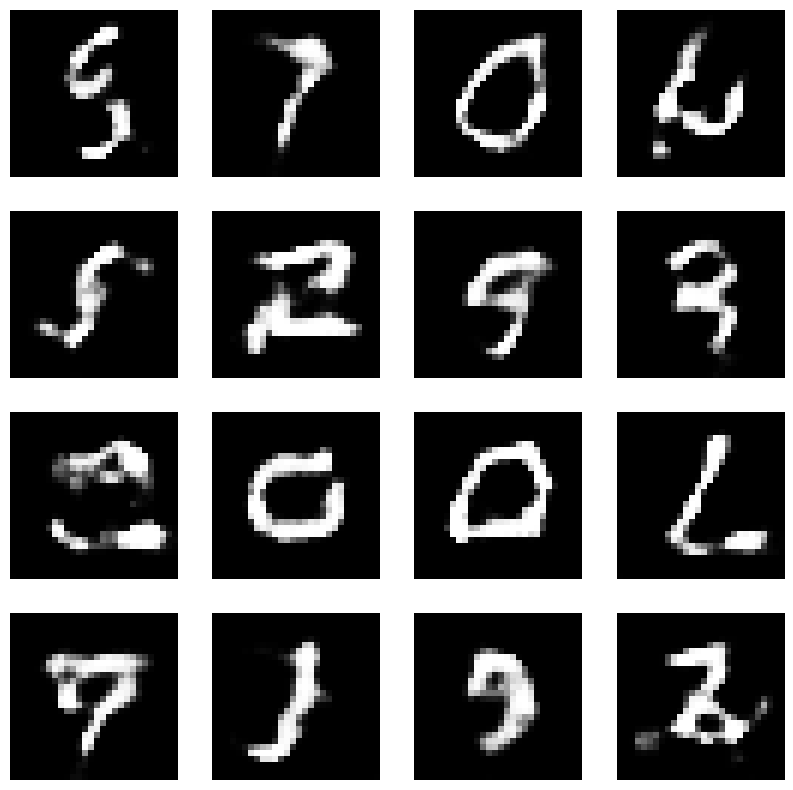

Epoch:  75


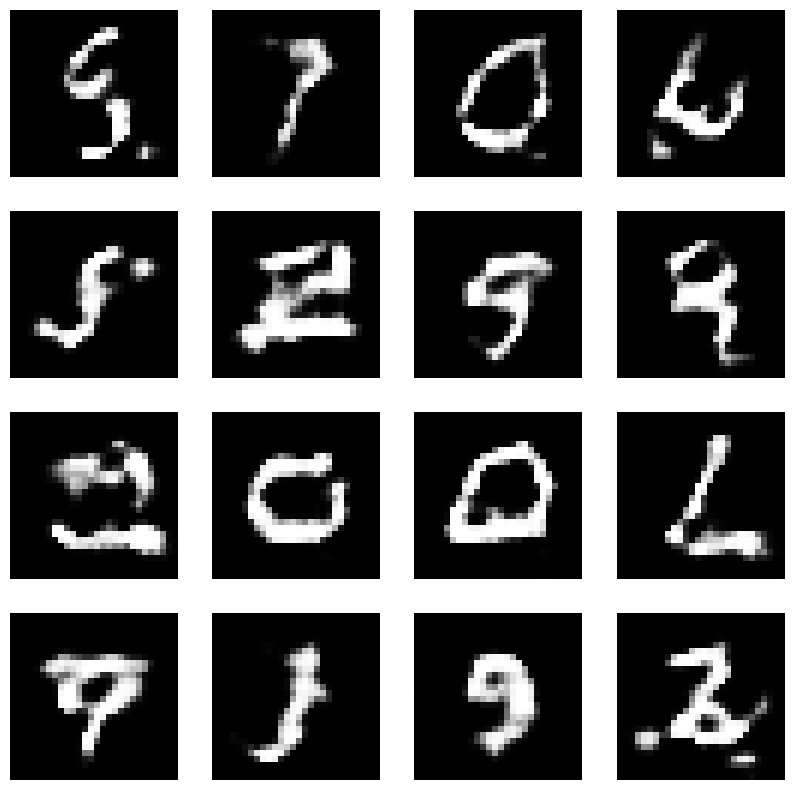

Epoch:  76


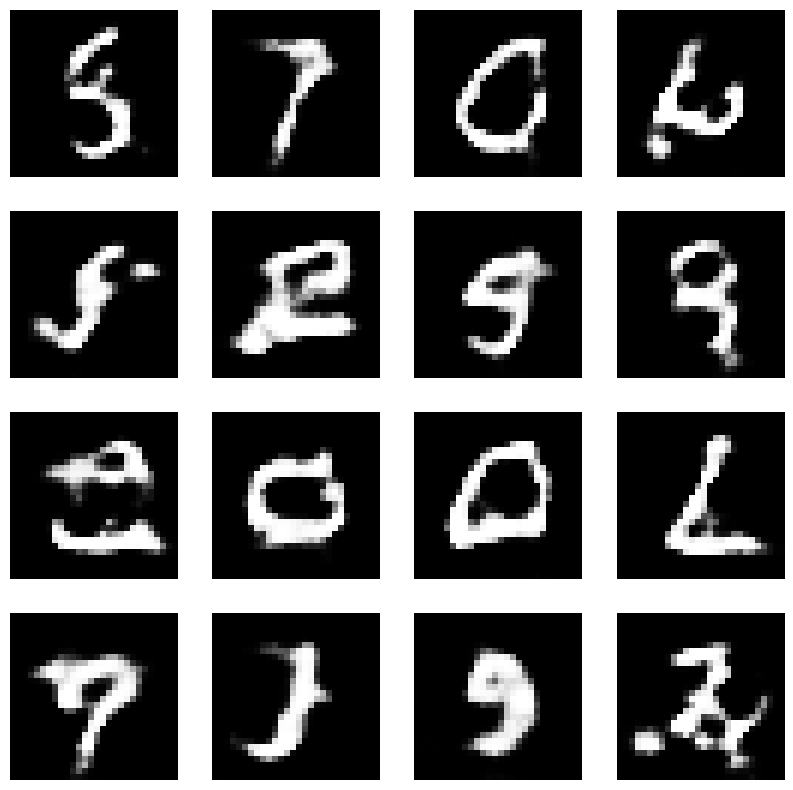

Epoch:  77


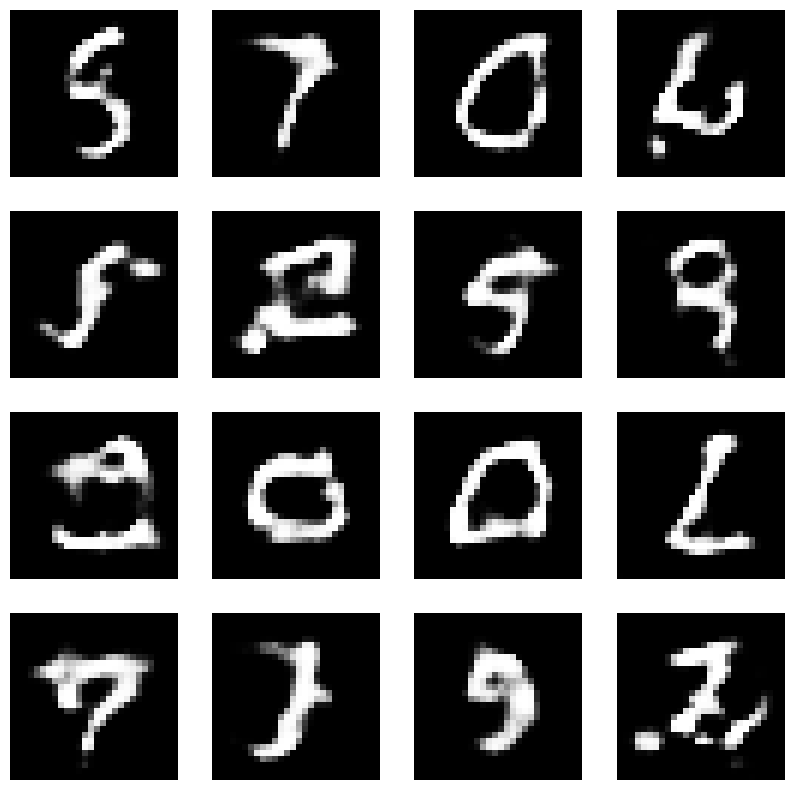

Epoch:  78


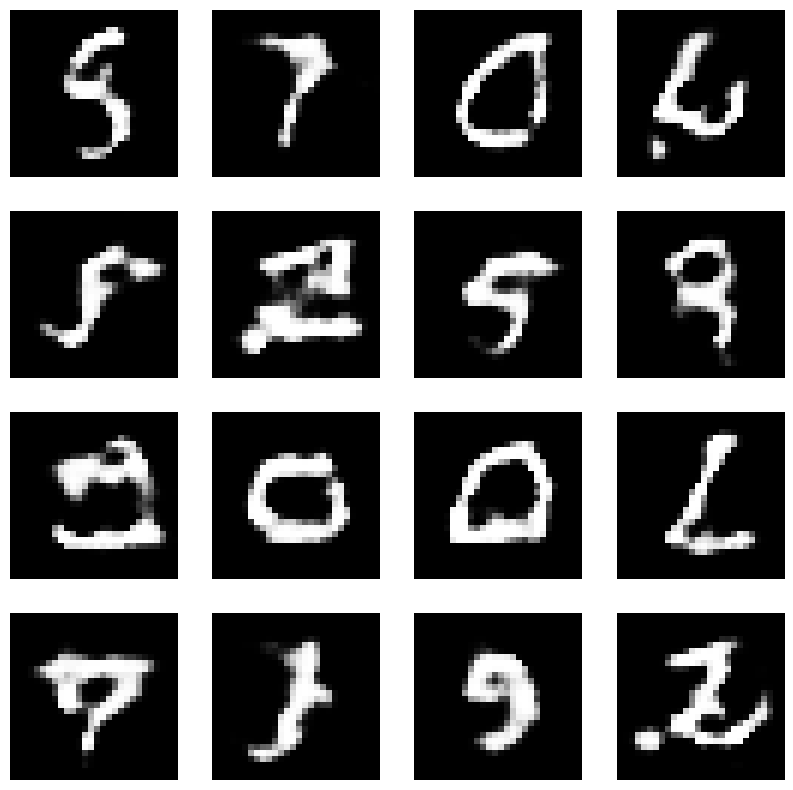

Epoch:  79


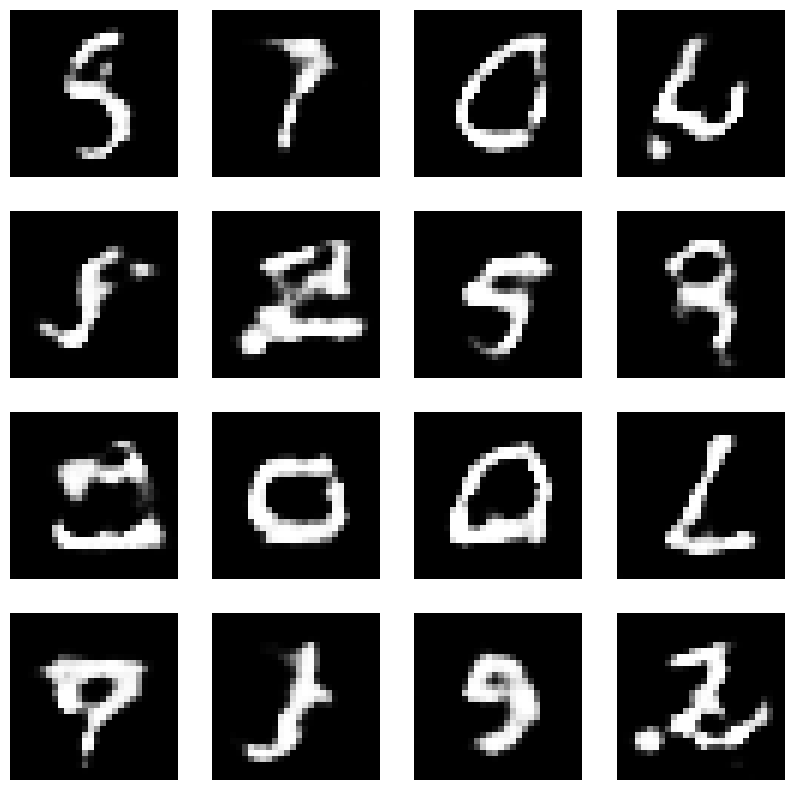

Epoch:  80


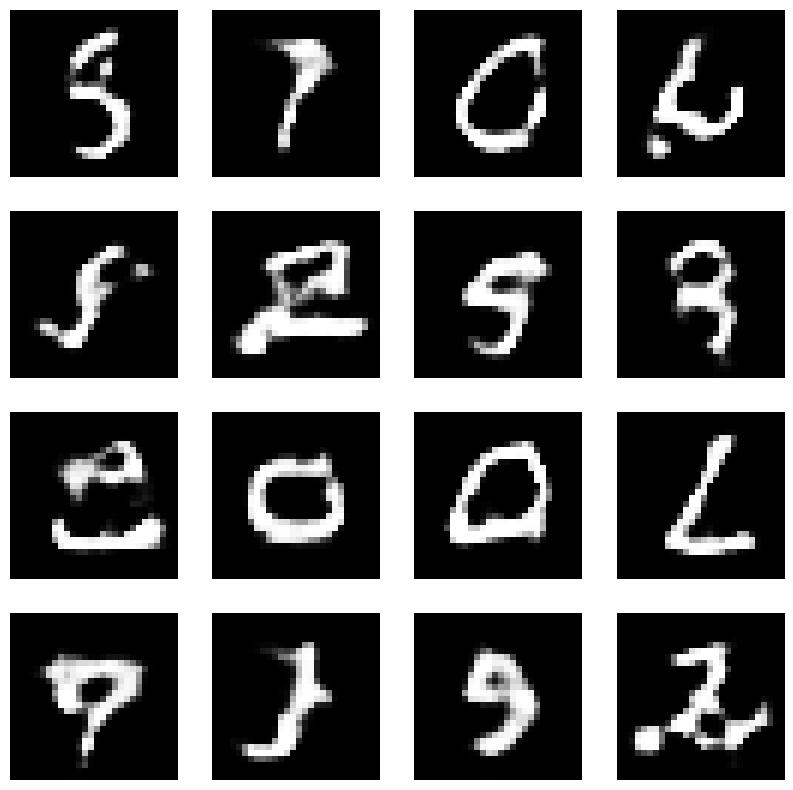

Epoch:  81


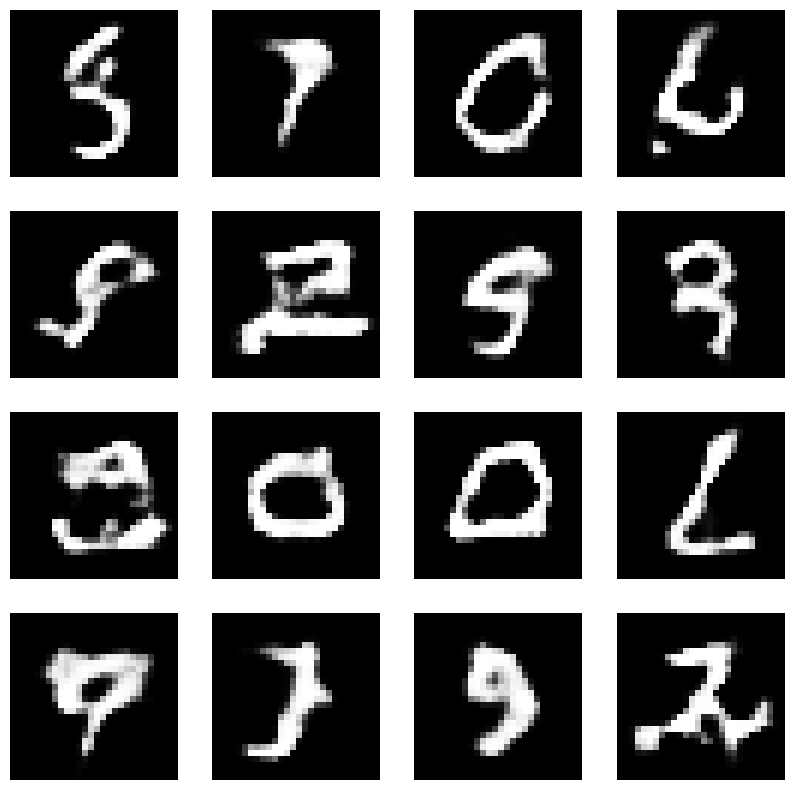

Epoch:  82


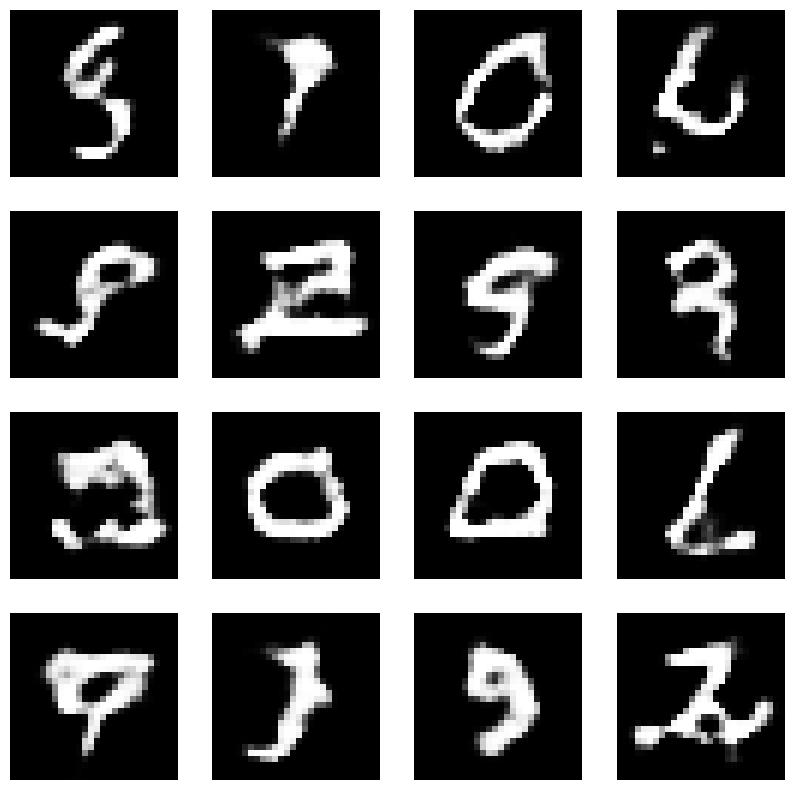

Epoch:  83


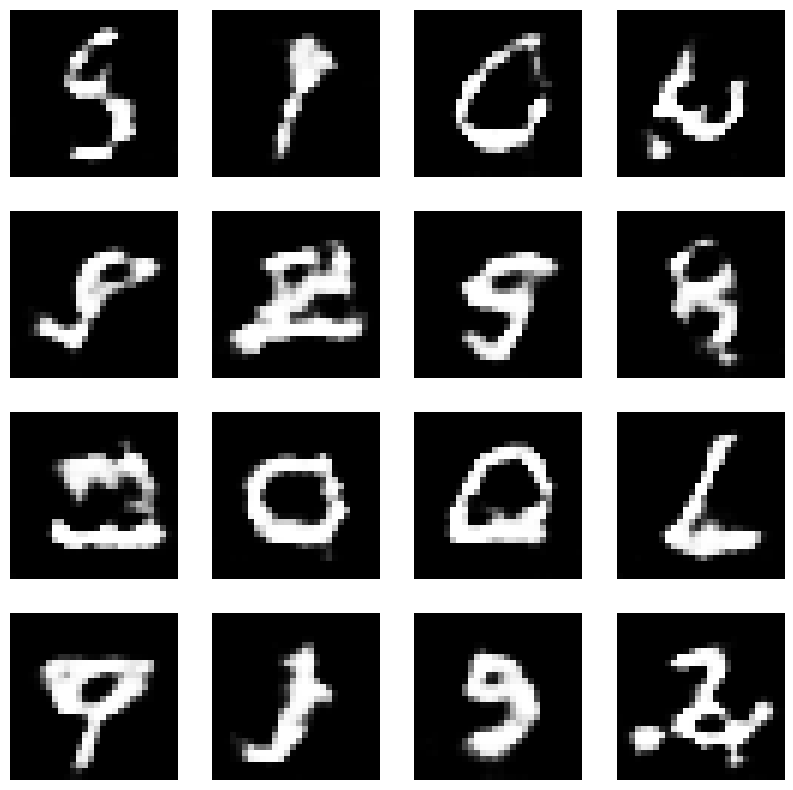

Epoch:  84


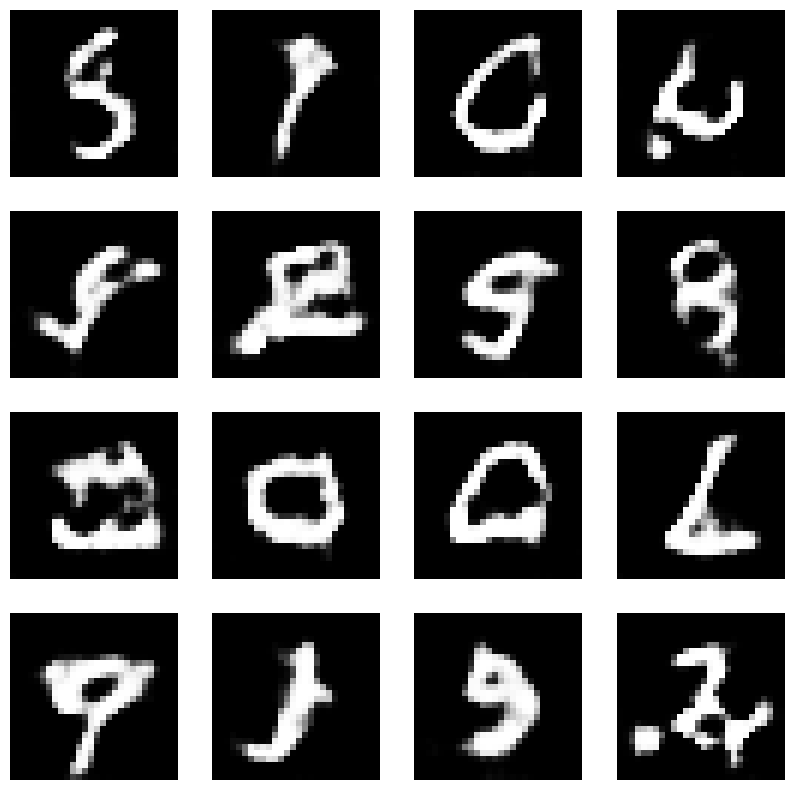

Epoch:  85


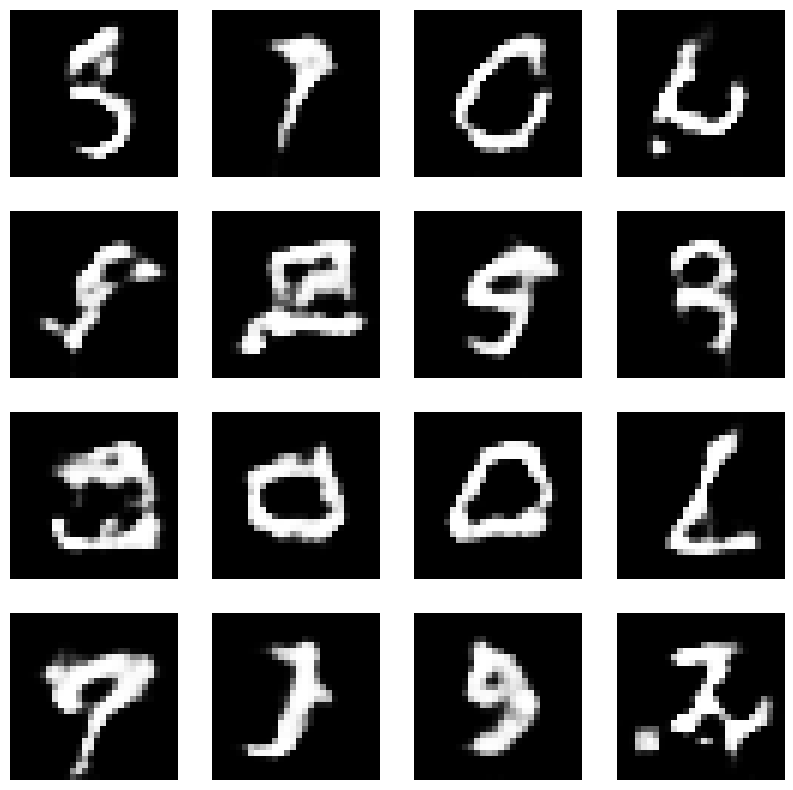

Epoch:  86


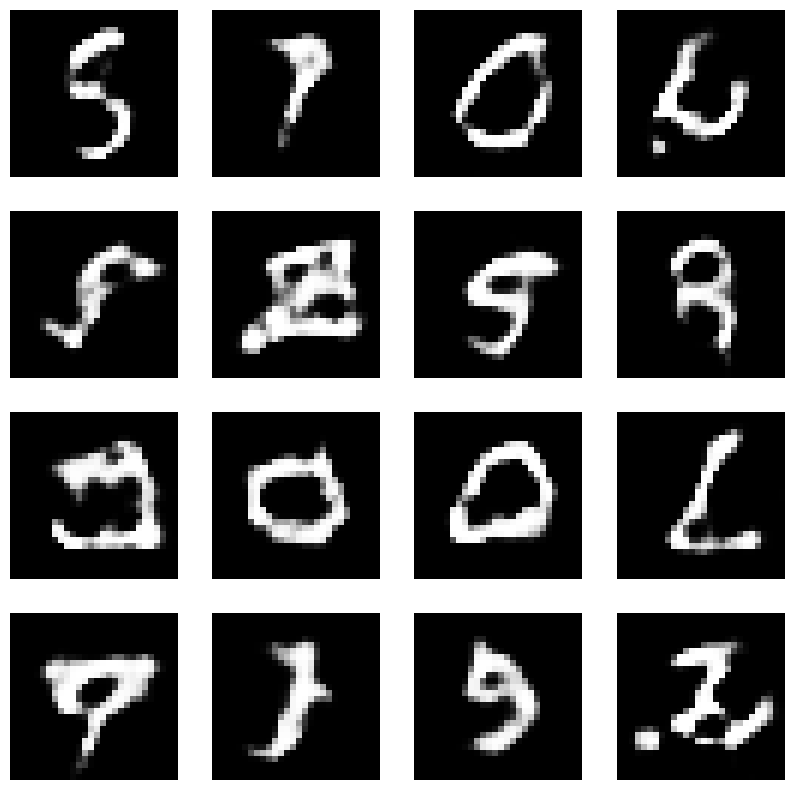

Epoch:  87


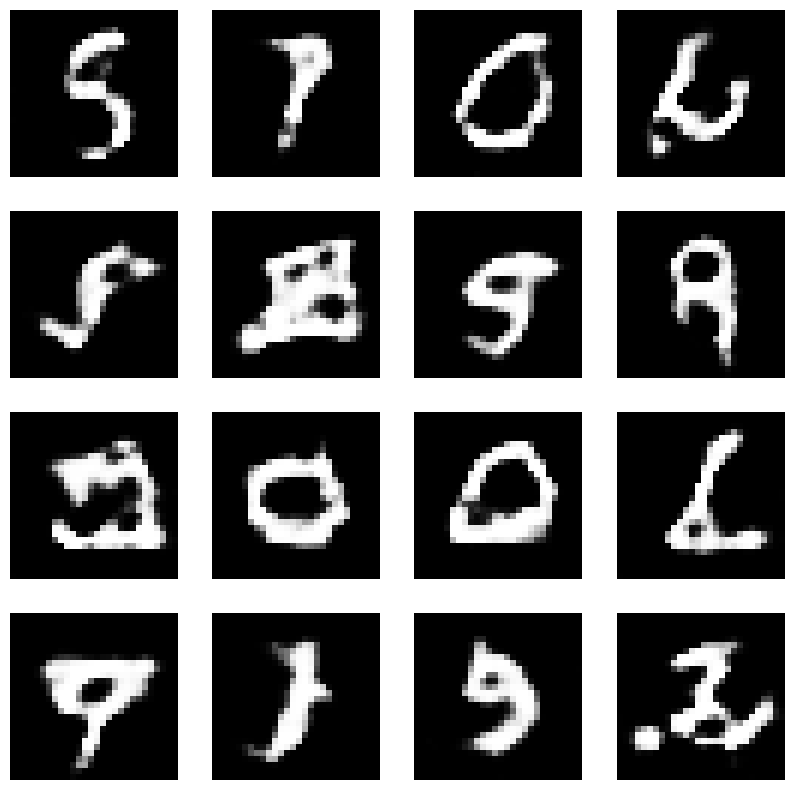

Epoch:  88


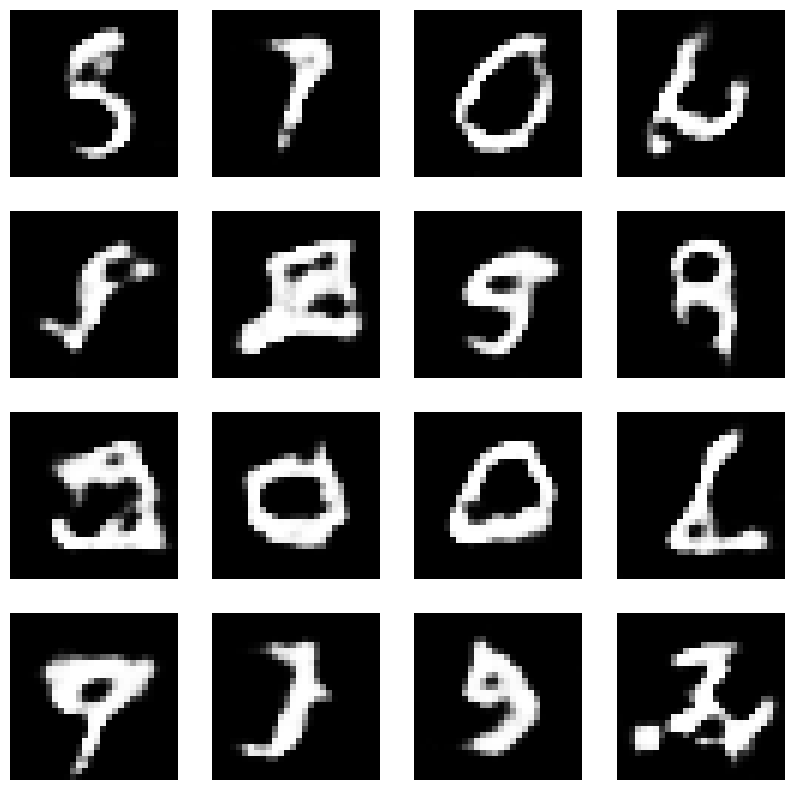

Epoch:  89


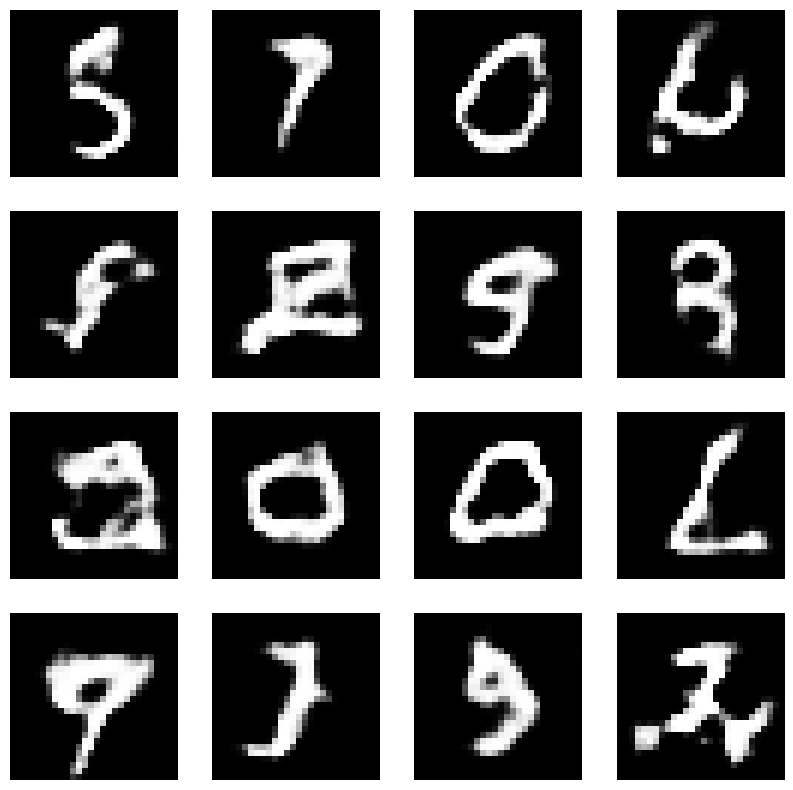

Epoch:  90


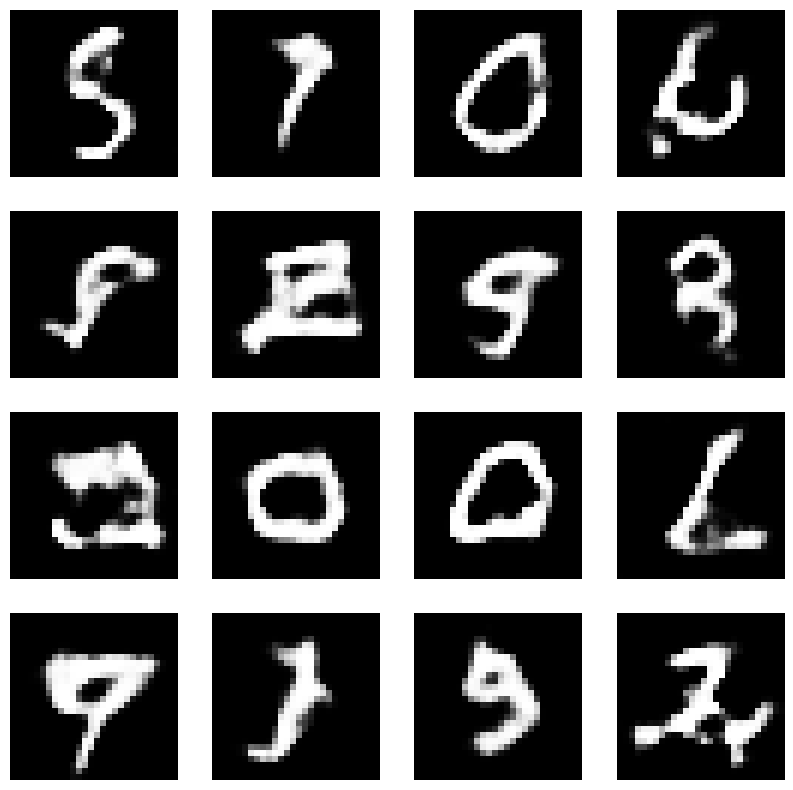

Epoch:  91


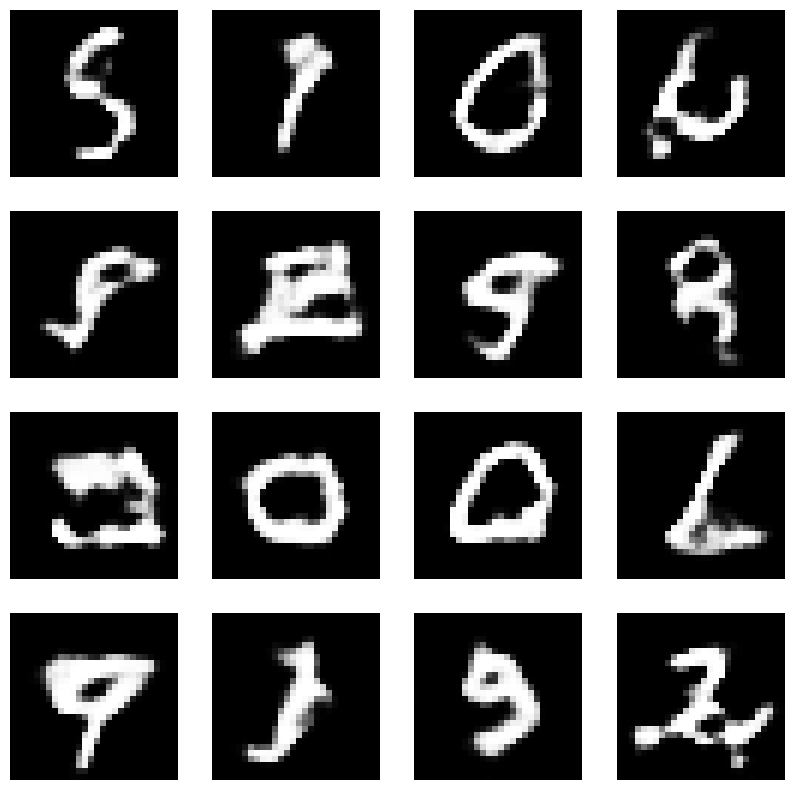

Epoch:  92


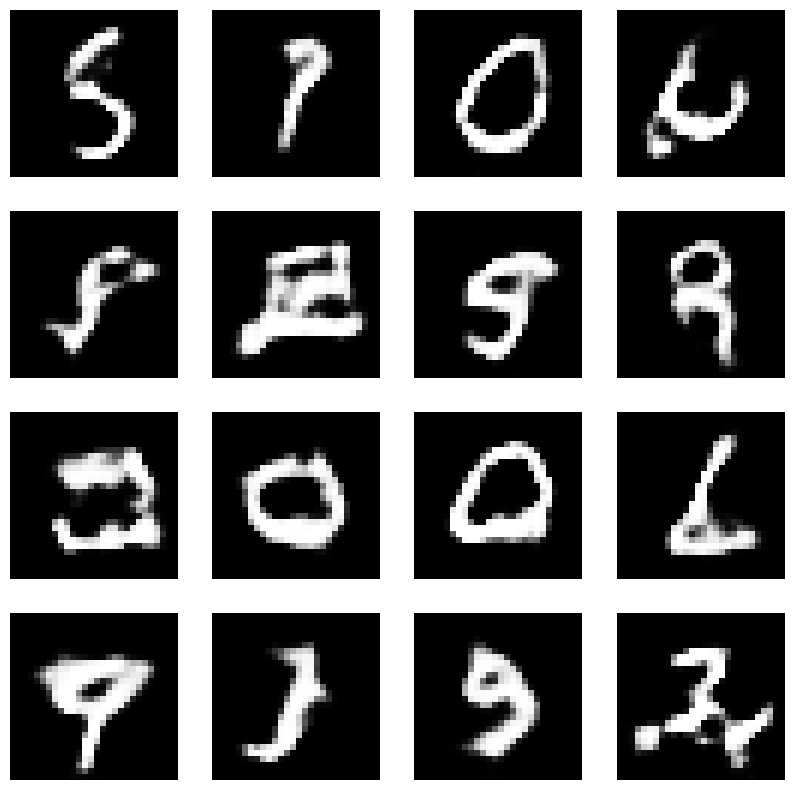

Epoch:  93


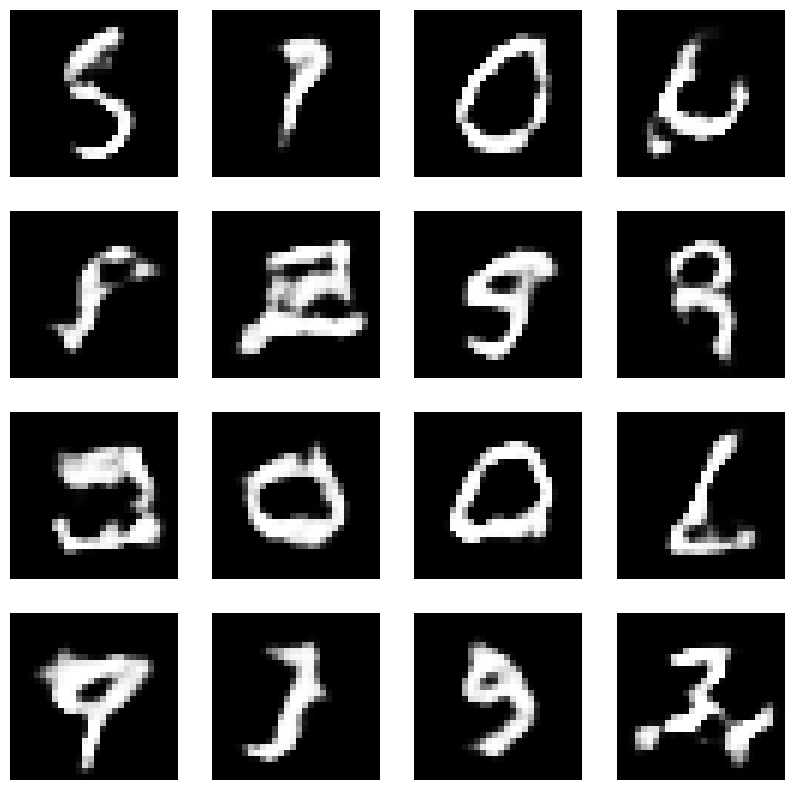

Epoch:  94


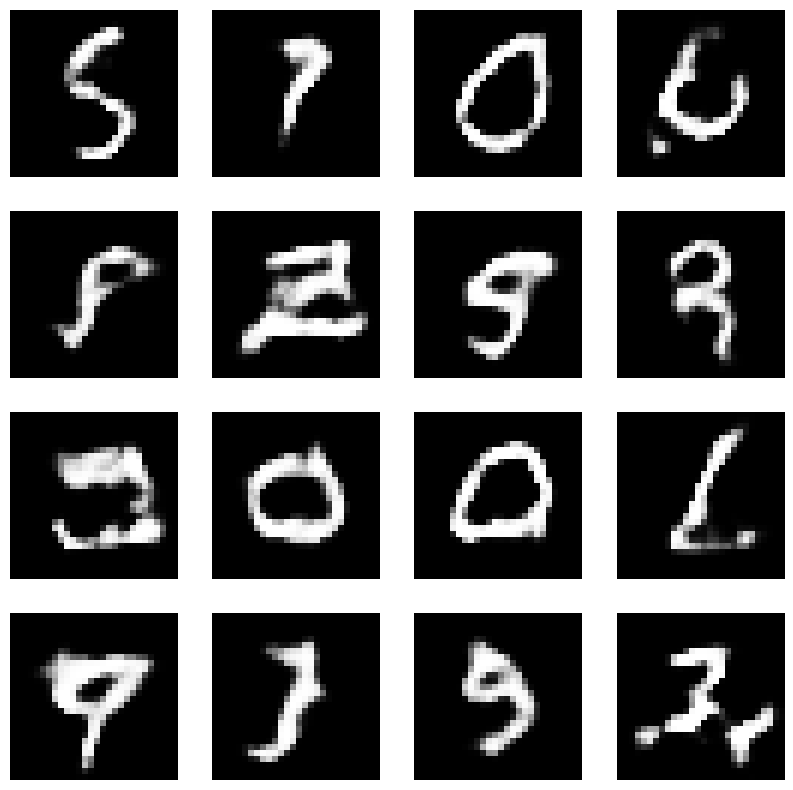

Epoch:  95


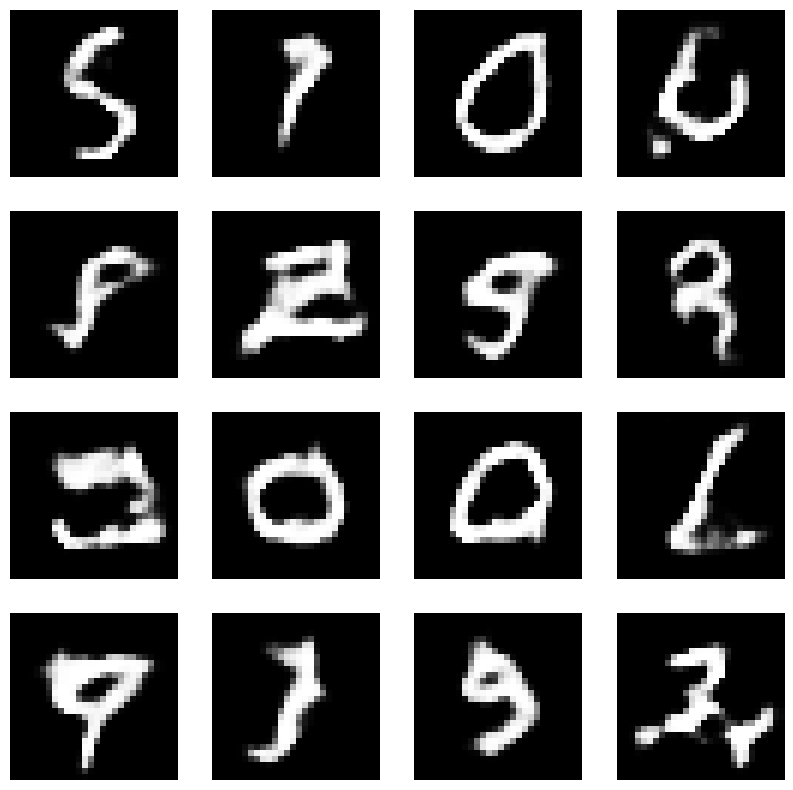

Epoch:  96


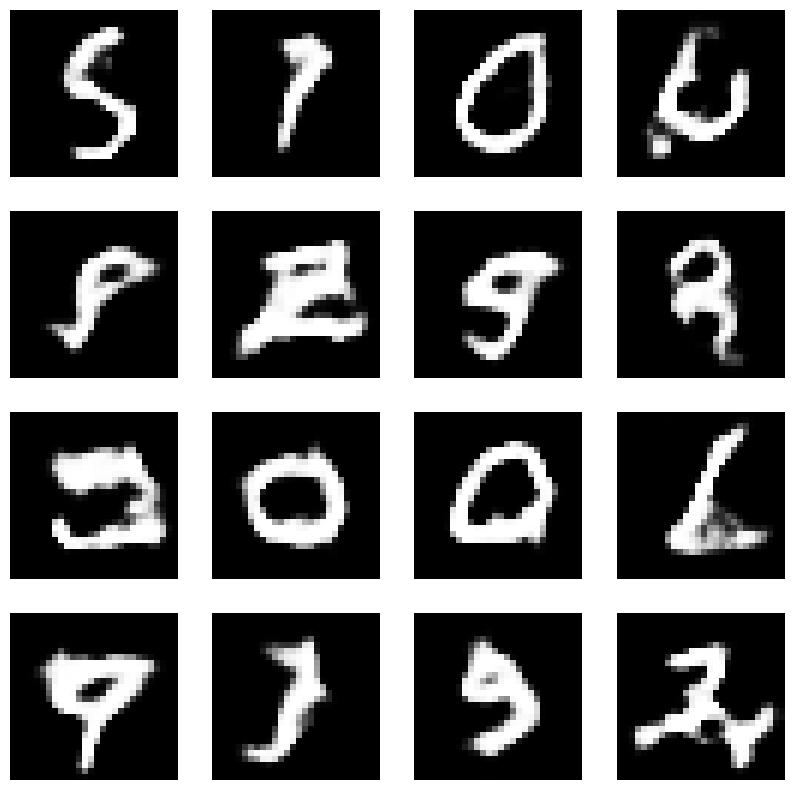

Epoch:  97


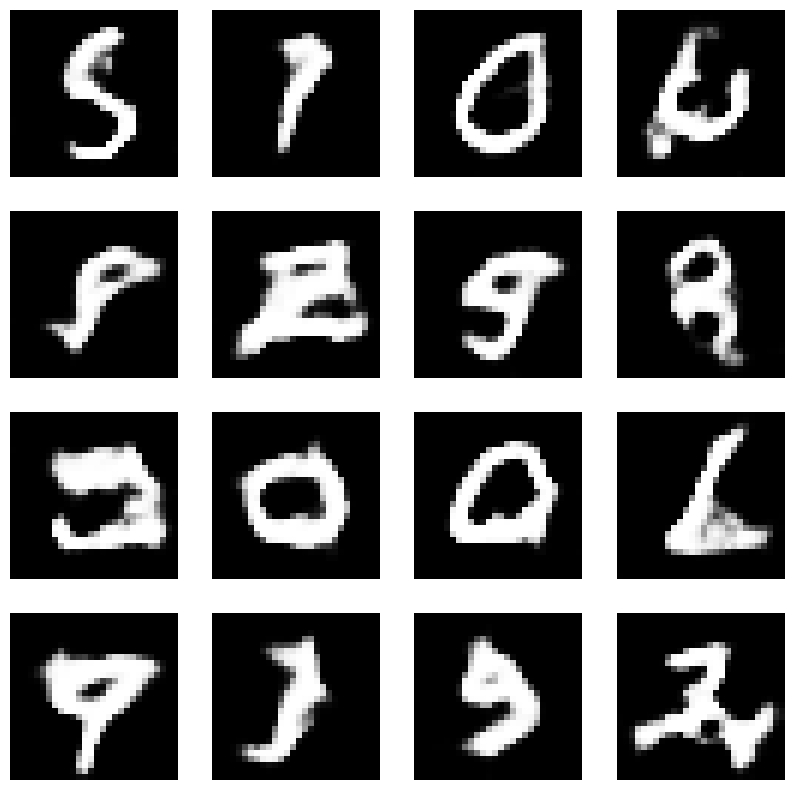

Epoch:  98


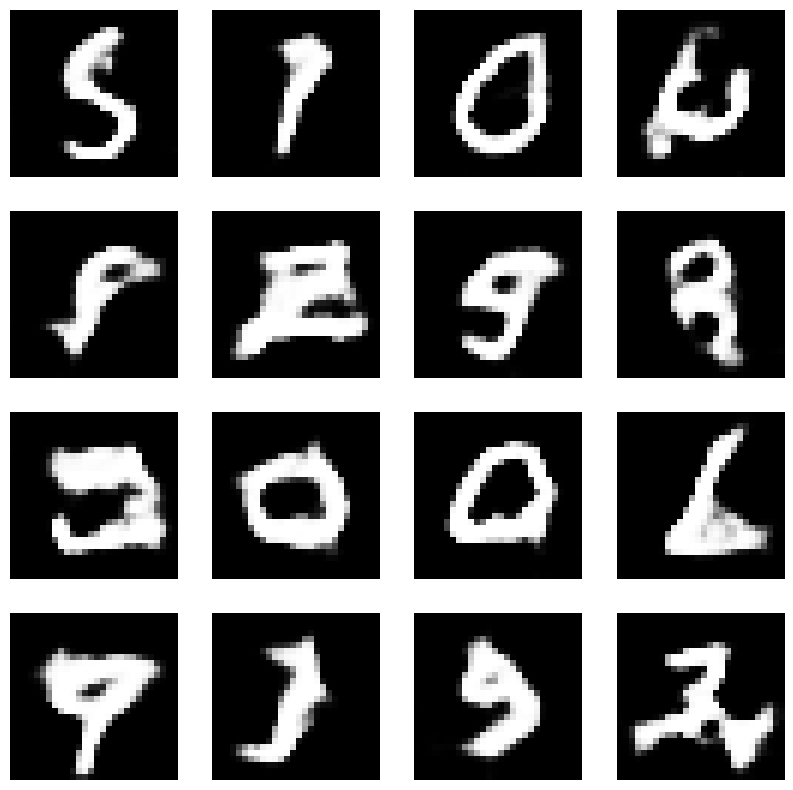

Epoch:  99


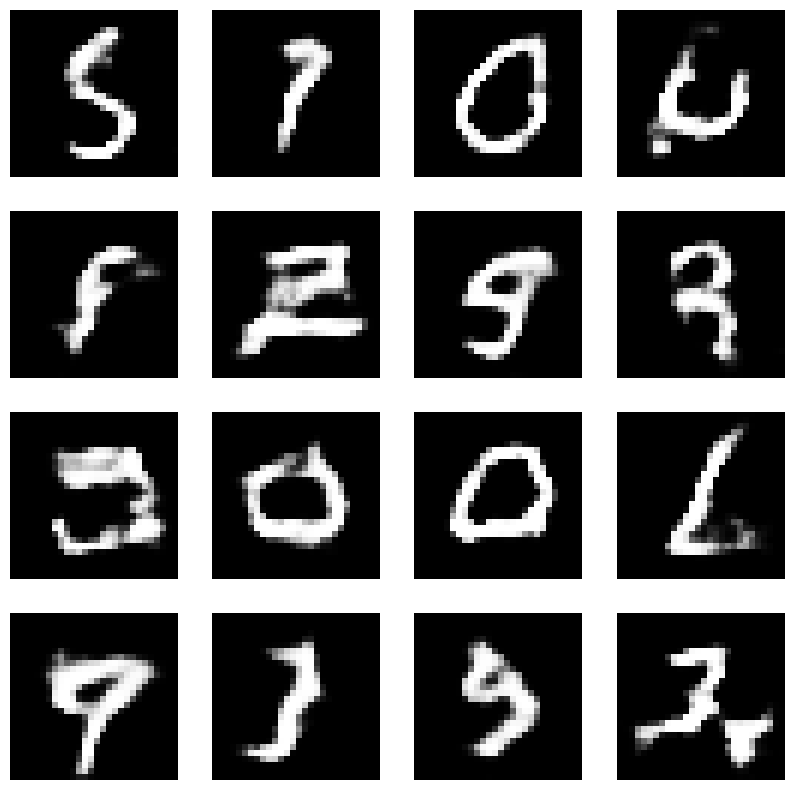

Epoch:  100


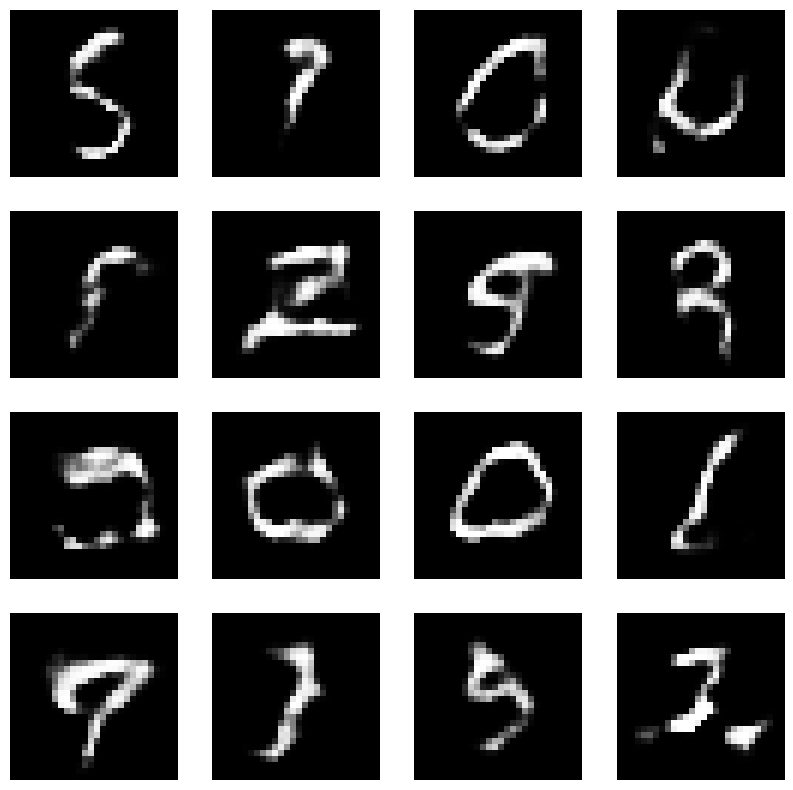

In [126]:
train_gan(X_train, epochs, test_images)